In [1]:
import requests
import pandas as pd

def fetch_all_data():
    # Base URL for the hourly region data API endpoint.
    base_url = "https://api.eia.gov/v2/electricity/rto/region-data/data/"
    api_key = "QPB6iXLFXYLNVdz2nhVAqFnbD6dVQjb5vNSKTANC"
    
    # Set up API parameters.
    params = {
        "frequency": "hourly",
        "data[0]": "value",
        "facets[type][]": ["D", "NG"],
        "facets[respondent][]": ["MISO"],
        "start": "2019-01-01T00",
        "end": "2025-03-21T00",
        "sort[0][column]": "period",
        "sort[0][direction]": "desc",
        "offset": 0,
        "length": 5000,  # maximum rows per call
        "api_key": api_key
    }
    
    # Make the initial API call to determine the total number of rows.
    response = requests.get(base_url, params=params)
    response.raise_for_status()
    json_data = response.json()
    
    total = int(json_data["response"]["total"])
    all_data = json_data["response"]["data"]
    print(f"Total rows to fetch: {total}")
    
    # Iterate using offset until all pages are retrieved.
    offset = 5000
    while offset < total:
        print(f"Fetching offset: {offset}")
        params["offset"] = offset
        resp = requests.get(base_url, params=params)
        resp.raise_for_status()
        page_data = resp.json()["response"]["data"]
        if not page_data:
            break
        all_data.extend(page_data)
        offset += 5000
        
    return all_data

def pivot_data(data):
    # Convert list of dictionaries into a DataFrame.
    df = pd.DataFrame(data)
    
    # Convert 'period' to datetime and 'value' to numeric.
    df["period"] = pd.to_datetime(df["period"], errors="coerce")
    df["value"] = pd.to_numeric(df["value"], errors="coerce")
    
    # Create a new column to pivot by combining 'respondent' and 'type'.
    df["col"] = df["respondent"] + "_" + df["type"]
    
    # Pivot the DataFrame so that each row represents an hour.
    df_pivot = df.pivot_table(index="period", columns="col", values="value", aggfunc="first")
    
    # Clean up the pivoted DataFrame.
    df_pivot.columns.name = None
    df_pivot = df_pivot.sort_index()
    
    return df_pivot

print("Fetching hourly region data for MISO from the API...")
data = fetch_all_data()
print(f"Fetched {len(data)} rows of data.")

print("Pivoting the data so that each row represents an hour with region values...")
df_pivot = pivot_data(data)

# Display the first few rows of the pivoted DataFrame.
print(df_pivot.head())

# Save the pivoted DataFrame to a CSV file.
df_pivot.to_csv("eia_hourly_region_data_MISO.csv")
df_pivot


Fetching hourly region data for MISO from the API...
Total rows to fetch: 109010
Fetching offset: 5000
Fetching offset: 10000
Fetching offset: 15000
Fetching offset: 20000
Fetching offset: 25000
Fetching offset: 30000
Fetching offset: 35000
Fetching offset: 40000
Fetching offset: 45000
Fetching offset: 50000
Fetching offset: 55000
Fetching offset: 60000
Fetching offset: 65000
Fetching offset: 70000
Fetching offset: 75000
Fetching offset: 80000
Fetching offset: 85000
Fetching offset: 90000
Fetching offset: 95000
Fetching offset: 100000
Fetching offset: 105000
Fetched 109010 rows of data.
Pivoting the data so that each row represents an hour with region values...
                      MISO_D  MISO_NG
period                               
2019-01-01 00:00:00  74304.0  70466.0
2019-01-01 01:00:00  73391.0  69693.0
2019-01-01 02:00:00  71531.0  67805.0
2019-01-01 03:00:00  69562.0  66177.0
2019-01-01 04:00:00  67744.0  64142.0


MISO_D  MISO_NG
period                               
2019-01-01 00:00:00  74304.0  70466.0
2019-01-01 01:00:00  73391.0  69693.0
2019-01-01 02:00:00  71531.0  67805.0
2019-01-01 03:00:00  69562.0  66177.0
2019-01-01 04:00:00  67744.0  64142.0
...                      ...      ...
2025-03-20 20:00:00  68715.0  66854.0
2025-03-20 21:00:00  67750.0  66868.0
2025-03-20 22:00:00  67654.0  66575.0
2025-03-20 23:00:00  68437.0  67785.0
2025-03-21 00:00:00  69737.0  67780.0

[54470 rows x 2 columns]

In [3]:
import requests
import pandas as pd

def fetch_all_data():
    # Base URL for the hourly region sub-BA data API endpoint.
    base_url = "https://api.eia.gov/v2/electricity/rto/region-sub-ba-data/data/"
    api_key = "QPB6iXLFXYLNVdz2nhVAqFnbD6dVQjb5vNSKTANC"
    
    # Set up API parameters.
    params = {
        "frequency": "hourly",
        "data[0]": "value",
        "start": "2019-01-01T00",
        "end": "2025-03-21T00",
        "sort[0][column]": "period",
        "sort[0][direction]": "desc",
        "offset": 0,
        "length": 5000,  # maximum rows per call
        "api_key": api_key,
        "facets[subba][]": [
            "0001",
            "0004",
            "0006",
            "0027",
            "0035",
            "8910"
        ]
    }
    
    # Make the initial API call to determine the total number of rows.
    response = requests.get(base_url, params=params)
    response.raise_for_status()
    json_data = response.json()
    
    total = int(json_data["response"]["total"])
    all_data = json_data["response"]["data"]
    print(f"Total rows to fetch: {total}")
    
    # Iterate using offset until all pages are retrieved.
    offset = 5000
    while offset < total:
        print(f"Fetching offset: {offset}")
        params["offset"] = offset
        resp = requests.get(base_url, params=params)
        resp.raise_for_status()
        page_data = resp.json()["response"]["data"]
        if not page_data:
            break
        all_data.extend(page_data)
        offset += 5000
        
    return all_data

def pivot_data(data):
    # Convert the list of dictionaries into a DataFrame.
    df = pd.DataFrame(data)
    
    # Convert the period column to datetime and value to numeric.
    df["period"] = pd.to_datetime(df["period"], errors="coerce")
    df["value"] = pd.to_numeric(df["value"], errors="coerce")
    
    # Create a new column for pivoting.
    # Since the data does not include a "timezone" column, we use only "parent" and "subba".
    df["col"] = df["parent"] + "_" + df["subba"]
    
    # Pivot the DataFrame so that each row corresponds to a period (hour),
    # and each unique combination becomes its own column.
    df_pivot = df.pivot_table(index="period", columns="col", values="value", aggfunc="first")
    
    # Remove the columns' name and sort by date.
    df_pivot.columns.name = None
    df_pivot = df_pivot.sort_index()
    
    return df_pivot

print("Fetching hourly region sub-BA data from the API...")
data = fetch_all_data()
print(f"Fetched {len(data)} rows of data.")

print("Pivoting the data so that each row represents an hour with subregion values...")
df_pivot = pivot_data(data)

# Display the first few rows of the pivoted DataFrame.
print(df_pivot.head())

# Optionally, save the DataFrame to a CSV file.
df_pivot.to_csv("eia_hourly_region_sub_ba_data.csv")
df_pivot


Fetching hourly region sub-BA data from the API...
Total rows to fetch: 326749
Fetching offset: 5000
Fetching offset: 10000
Fetching offset: 15000
Fetching offset: 20000
Fetching offset: 25000
Fetching offset: 30000
Fetching offset: 35000
Fetching offset: 40000
Fetching offset: 45000
Fetching offset: 50000
Fetching offset: 55000
Fetching offset: 60000
Fetching offset: 65000
Fetching offset: 70000
Fetching offset: 75000
Fetching offset: 80000
Fetching offset: 85000
Fetching offset: 90000
Fetching offset: 95000
Fetching offset: 100000
Fetching offset: 105000
Fetching offset: 110000
Fetching offset: 115000
Fetching offset: 120000
Fetching offset: 125000
Fetching offset: 130000
Fetching offset: 135000
Fetching offset: 140000
Fetching offset: 145000
Fetching offset: 150000
Fetching offset: 155000
Fetching offset: 160000
Fetching offset: 165000
Fetching offset: 170000
Fetching offset: 175000
Fetching offset: 180000
Fetching offset: 185000
Fetching offset: 190000
Fetching offset: 195000
Fetch

MISO_0001  MISO_0004  MISO_0006  MISO_0027  MISO_0035  \
period                                                                       
2019-01-01 00:00:00    12927.0     5406.0     9700.0    18169.0    10370.0   
2019-01-01 01:00:00    12774.0     5289.0     9453.0    17668.0    10225.0   
2019-01-01 02:00:00    12451.0     5131.0     9255.0    17084.0     9926.0   
2019-01-01 03:00:00    12099.0     5014.0     9055.0    16466.0     9642.0   
2019-01-01 04:00:00    11775.0     4897.0     8904.0    15896.0     9422.0   
...                        ...        ...        ...        ...        ...   
2025-03-20 20:00:00     9811.0     4237.0    10435.0    17636.0     9613.0   
2025-03-20 21:00:00     9684.0     4156.0    10273.0    17379.0     9395.0   
2025-03-20 22:00:00     9746.0     4193.0    10222.0    17385.0     9269.0   
2025-03-20 23:00:00     9979.0     4346.0    10339.0    17454.0     9411.0   
2025-03-21 00:00:00    10384.0     4599.0    10330.0    17682.0     9531.0   

                     MISO_8910  
period                          
2019-01-01 00:00:00    17731.0  
2019-01-01 01:00:00    17982.0  
2019-01-01 02:00:00    17684.0  
2019-01-01 03:00:00    17287.0  
2019-01-01 04:00:00    16851.0  
...                        ...  
2025-03-20 20:00:00    16963.0  
2025-03-20 21:00:00    16842.0  
2025-03-20 22:00:00    16819.0  
2025-03-20 23:00:00    16888.0  
2025-03-21 00:00:00    17188.0  

[54470 rows x 6 columns]

In [12]:
import pandas as pd

# Assume df_pivot is your pivoted DataFrame, for example:
#                     PJM_AE  PJM_AEP  PJM_AP  ...  PJM_PS  PJM_RECO
# period                                                    
# 2019-01-01 00:00:00    1339    14446    6384  ...    5324       207
# 2019-01-01 01:00:00    1293    13870    6151  ...    5150       201
# ...

# List of PJM columns that you want to sum to create MISO_TOTAL
miso_list = ["MISO_0001", "MISO_0004", "MISO_0006", "MISO_0027", "MISO_0035", "MISO_8910"]

# Create the MISO_TOTAL column as the sum of the specified PJM columns
df_pivot["MISO_TOTAL"] = df_pivot[miso_list].sum(axis=1)

# Reset the index so that the period becomes a column, and rename it to TIME.
df_pivot = df_pivot.reset_index().rename(columns={"period": "TIME"})

# Format the TIME column as a string in the desired format "MM/DD/YYYY HH:MM".
df_pivot["TIME"] = pd.to_datetime(df_pivot["TIME"]).dt.strftime('%m/%d/%Y %H:%M')

# Create a DATE column from the TIME column (convert back to datetime then extract the date)
df_pivot["DATE"] = pd.to_datetime(df_pivot["TIME"], format='%m/%d/%Y %H:%M').dt.date

# Group by DATE and compute the maximum value for each day for the PJM columns (including PJM_TOTAL)
daily_load = df_pivot.groupby("DATE")[miso_list + ["MISO_TOTAL"]].max().reset_index()

# Display the sample results
print("Hourly data sample:")
print(df_pivot.head())

print("\nDaily maximum load sample:")
daily_load


Hourly data sample:
   level_0  index              TIME  MISO_0001  MISO_0004  MISO_0006  \
0        0      0  01/01/2019 00:00    12927.0     5406.0     9700.0   
1        1      1  01/01/2019 01:00    12774.0     5289.0     9453.0   
2        2      2  01/01/2019 02:00    12451.0     5131.0     9255.0   
3        3      3  01/01/2019 03:00    12099.0     5014.0     9055.0   
4        4      4  01/01/2019 04:00    11775.0     4897.0     8904.0   

   MISO_0027  MISO_0035  MISO_8910  PJM_TOTAL        DATE  MISO_TOTAL  
0    18169.0    10370.0    17731.0    74303.0  2019-01-01     74303.0  
1    17668.0    10225.0    17982.0    73391.0  2019-01-01     73391.0  
2    17084.0     9926.0    17684.0    71531.0  2019-01-01     71531.0  
3    16466.0     9642.0    17287.0    69563.0  2019-01-01     69563.0  
4    15896.0     9422.0    16851.0    67745.0  2019-01-01     67745.0  

Daily maximum load sample:


DATE  MISO_0001  MISO_0004  MISO_0006  MISO_0027  MISO_0035  \
0     2019-01-01    12927.0     5406.0     9912.0    18169.0    10387.0   
1     2019-01-02    12931.0     6133.0    11389.0    20534.0    11313.0   
2     2019-01-03    13114.0     6343.0    11715.0    20977.0    11631.0   
3     2019-01-04    12462.0     6011.0    11654.0    20391.0    10875.0   
4     2019-01-05    11739.0     5731.0    10899.0    19380.0    10316.0   
...          ...        ...        ...        ...        ...        ...   
2267  2025-03-17    11549.0     5342.0    11187.0    18609.0    10660.0   
2268  2025-03-18    11515.0     4791.0    10346.0    18098.0     9674.0   
2269  2025-03-19    11753.0     4699.0     9498.0    18075.0     9779.0   
2270  2025-03-20    11856.0     5117.0    10714.0    18561.0    10784.0   
2271  2025-03-21    10384.0     4599.0    10330.0    17682.0     9531.0   

      MISO_8910  MISO_TOTAL  
0       17982.0     74303.0  
1       19805.0     81638.0  
2       21048.0     84368.0  
3       20805.0     81466.0  
4       20890.0     78317.0  
...         ...         ...  
2267    19649.0     76996.0  
2268    18054.0     72226.0  
2269    18354.0     70713.0  
2270    18657.0     74903.0  
2271    17188.0     69714.0  

[2272 rows x 8 columns]

In [13]:
import pandas as pd
import glob
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

path = '../observations/*.csv'

all_files = glob.glob(path)

# Create an empty list to store the DataFrames
dfs = []

for file in all_files:
    df = pd.read_csv(file)
    dfs.append(df)

stations = pd.concat(dfs, ignore_index=True)

# Display the combined DataFrame
stations['AvgTemp'] = (stations['MinTemp'] + stations['MaxTemp']) / 2
stations['TotalDD'] = stations['CDD'] + stations['HDD']
stations

date station  MinTemp  MaxTemp  HDD  CDD  AvgTemp  TotalDD
0        2009-07-09    KABR       62       83    0    8     72.5        8
1        2009-07-09    KABI       80      106    0   28     93.0       28
2        2009-07-09    KALB       55       76    0    0     65.5        0
3        2009-07-09    KABQ       69       94    0   16     81.5       16
4        2009-07-09    KABE       53       78    0    0     65.5        0
...             ...     ...      ...      ...  ...  ...      ...      ...
2236486  2025-03-20    KHBG       39       68   12    0     53.5       12
2236487  2025-03-20    CYXU       28       60   21    0     44.0       21
2236488  2025-03-20    KLMT       23       45   31    0     34.0       31
2236489  2025-03-20    KWWR       25       63   21    0     44.0       21
2236490  2025-03-20    KCLK       28       61   21    0     44.5       21

[2236491 rows x 8 columns]

In [14]:
# MISO Regions and Station Weightings

MISO_0001 = {
    'KMSP': 0.50,  # Minneapolis, MN
    'KMSN': 0.30,  # Madison, WI (representing western WI)
    'KFAR': 0.20   # Fargo, ND
}

MISO_0004 = {
    'KSTL': 0.70,  # St. Louis, MO (bordering southern IL)
    'KSPI': 0.30   # Springfield, IL
}

MISO_0006 = {
    'KIND': 0.60,  # Indianapolis, IN
    'KFWA': 0.25,  # Fort Wayne, IN
    'KEVV': 0.15   # Evansville, IN
}

MISO_0027 = {
    'KDTW': 0.40,  # Detroit, MI
    'KMKE': 0.25,  # Milwaukee, WI
    'KGRR': 0.15,  # Grand Rapids, MI
    'KGRB': 0.10,  # Green Bay, WI
    'KLAN': 0.10   # Lansing, MI
}

MISO_0035 = {
    'KDSM': 0.50,  # Des Moines, IA
    'KCID': 0.30,  # Cedar Rapids, IA
    'KCOU': 0.20   # Columbia, MO
}

MISO_8910 = {
    'KMSY': 0.30,  # New Orleans, LA
    'KBTR': 0.25,  # Baton Rouge, LA
    'KJAN': 0.20,  # Jackson, MS
    'KLIT': 0.15,  # Little Rock, AR
    'KLFT': 0.10   # Lafayette, LA
}

MISO_TOTAL = {
    'KDTW': 0.21133,  # Detroit, MI
    'KMSP': 0.17867,  # Minneapolis, MN
    'KSTL': 0.13591,  # St. Louis, MO
    'KIND': 0.1022,   # Indianapolis, IN
    'KMKE': 0.07624,  # Milwaukee, WI
    'KMSY': 0.06151,  # New Orleans, LA
    'KGRR': 0.05216,  # Grand Rapids, MI
    'KBTR': 0.04215,  # Baton Rouge, LA
    'KDSM': 0.03385,  # Des Moines, IA
    'KMSN': 0.03296,  # Madison, WI
    'KJAN': 0.0288,   # Jackson, MS
    'KCID': 0.01339,  # Cedar Rapids, IA
    'KSPI': 0.00997,  # Springfield, IL
    'KLIT': 0.00988,  # Little Rock, AR
    'KLFT': 0.00613,  # Lafayette, LA
    'KIAH': 0.00484   # Houston, TX
}

In [15]:
import pandas as pd

# Ensure DATE columns are datetime
daily_load['DATE'] = pd.to_datetime(daily_load['DATE'])
stations['date'] = pd.to_datetime(stations['date'])

# Metrics to aggregate
metrics = ['MinTemp', 'MaxTemp', 'HDD', 'CDD', 'AvgTemp', 'TotalDD']


# Mapping of regions to weights (assuming these dictionaries are already defined)
region_weights = {
    'MISO_0001': MISO_0001,
    'MISO_0004': MISO_0004,
    'MISO_0006': MISO_0006,
    'MISO_0027': MISO_0027,
    'MISO_0035': MISO_0035,
    'MISO_8910': MISO_8910,
    'MISO_TOTAL': MISO_TOTAL,
}

# Initialize the combined DataFrame
combined_df = daily_load.copy()

# For each metric and region, compute the weighted average and map it into combined_df
for metric in metrics:
    for region, weights in region_weights.items():
        # Extract relevant stations
        region_stations = stations[stations['station'].isin(weights.keys())]
        
        # Compute weighted average per day as a Series with 'date' as its index
        weighted_avg = (
            region_stations
            .assign(weight=region_stations['station'].map(weights))
            .groupby('date')
            .apply(lambda x: (x[metric] * x['weight']).sum() / x['weight'].sum())
        )
        
        # Map the computed weighted average to the daily_load DataFrame based on DATE
        combined_df[f'{region}_{metric}'] = combined_df['DATE'].map(weighted_avg)

# Display result
combined_df


DATE  MISO_0001  MISO_0004  MISO_0006  MISO_0027  MISO_0035  \
0    2019-01-01    12927.0     5406.0     9912.0    18169.0    10387.0   
1    2019-01-02    12931.0     6133.0    11389.0    20534.0    11313.0   
2    2019-01-03    13114.0     6343.0    11715.0    20977.0    11631.0   
3    2019-01-04    12462.0     6011.0    11654.0    20391.0    10875.0   
4    2019-01-05    11739.0     5731.0    10899.0    19380.0    10316.0   
...         ...        ...        ...        ...        ...        ...   
2267 2025-03-17    11549.0     5342.0    11187.0    18609.0    10660.0   
2268 2025-03-18    11515.0     4791.0    10346.0    18098.0     9674.0   
2269 2025-03-19    11753.0     4699.0     9498.0    18075.0     9779.0   
2270 2025-03-20    11856.0     5117.0    10714.0    18561.0    10784.0   
2271 2025-03-21    10384.0     4599.0    10330.0    17682.0     9531.0   

      MISO_8910  MISO_TOTAL  MISO_0001_MinTemp  MISO_0004_MinTemp  ...  \
0       17982.0     74303.0                1.9               30.7  ...   
1       19805.0     81638.0                5.5               28.7  ...   
2       21048.0     84368.0               20.3               23.7  ...   
3       20805.0     81466.0               25.9               26.5  ...   
4       20890.0     78317.0               24.2               33.1  ...   
...         ...         ...                ...                ...  ...   
2267    19649.0     76996.0               27.3               27.9  ...   
2268    18054.0     72226.0               32.3               51.2  ...   
2269    18354.0     70713.0               29.4               38.8  ...   
2270    18657.0     74903.0               23.5               34.6  ...   
2271    17188.0     69714.0                NaN                NaN  ...   

      MISO_0035_AvgTemp  MISO_8910_AvgTemp  MISO_TOTAL_AvgTemp  \
0                 20.85             58.675           32.037755   
1                 24.15             55.150           31.355914   
2                 33.20             55.525           36.653167   
3                 38.85             48.825           40.512235   
4                 42.85             50.925           42.463195   
...                 ...                ...                 ...   
2267              53.10             56.525           44.177692   
2268              60.65             61.875           54.969555   
2269              44.30             69.350           54.013210   
2270              38.30             54.275           41.853014   
2271                NaN                NaN                 NaN   

      MISO_0001_TotalDD  MISO_0004_TotalDD  MISO_0006_TotalDD  \
0                  57.0               29.9              25.55   
1                  48.9               34.6              29.55   
2                  34.8               30.9              30.95   
3                  29.8               26.6              26.05   
4                  30.0               19.2              23.10   
...                 ...                ...                ...   
2267               22.7               18.1              25.60   
2268               22.8                3.4               7.70   
2269               30.9                7.2               7.90   
2270               30.2               23.1              26.60   
2271                NaN                NaN                NaN   

      MISO_0027_TotalDD  MISO_0035_TotalDD  MISO_8910_TotalDD  \
0                 35.30               44.4               6.35   
1                 36.90               40.7              11.20   
2                 32.55               31.8               9.70   
3                 26.55               26.3              16.20   
4                 25.85               22.4              14.10   
...                 ...                ...                ...   
2267              30.20               11.9               8.80   
2268              14.45                6.0               4.00   
2269              12.40               20.8               5.90   
2270     

In [16]:
combined_df = combined_df.drop(combined_df.index[-1])
combined_df

DATE  MISO_0001  MISO_0004  MISO_0006  MISO_0027  MISO_0035  \
0    2019-01-01    12927.0     5406.0     9912.0    18169.0    10387.0   
1    2019-01-02    12931.0     6133.0    11389.0    20534.0    11313.0   
2    2019-01-03    13114.0     6343.0    11715.0    20977.0    11631.0   
3    2019-01-04    12462.0     6011.0    11654.0    20391.0    10875.0   
4    2019-01-05    11739.0     5731.0    10899.0    19380.0    10316.0   
...         ...        ...        ...        ...        ...        ...   
2266 2025-03-16    10962.0     4518.0     9773.0    15997.0     9425.0   
2267 2025-03-17    11549.0     5342.0    11187.0    18609.0    10660.0   
2268 2025-03-18    11515.0     4791.0    10346.0    18098.0     9674.0   
2269 2025-03-19    11753.0     4699.0     9498.0    18075.0     9779.0   
2270 2025-03-20    11856.0     5117.0    10714.0    18561.0    10784.0   

      MISO_8910  MISO_TOTAL  MISO_0001_MinTemp  MISO_0004_MinTemp  ...  \
0       17982.0     74303.0                1.9               30.7  ...   
1       19805.0     81638.0                5.5               28.7  ...   
2       21048.0     84368.0               20.3               23.7  ...   
3       20805.0     81466.0               25.9               26.5  ...   
4       20890.0     78317.0               24.2               33.1  ...   
...         ...         ...                ...                ...  ...   
2266    17763.0     65504.0               17.1               32.5  ...   
2267    19649.0     76996.0               27.3               27.9  ...   
2268    18054.0     72226.0               32.3               51.2  ...   
2269    18354.0     70713.0               29.4               38.8  ...   
2270    18657.0     74903.0               23.5               34.6  ...   

      MISO_0035_AvgTemp  MISO_8910_AvgTemp  MISO_TOTAL_AvgTemp  \
0                 20.85             58.675           32.037755   
1                 24.15             55.150           31.355914   
2                 33.20             55.525           36.653167   
3                 38.85             48.825           40.512235   
4                 42.85             50.925           42.463195   
...                 ...                ...                 ...   
2266              36.30             59.175           41.555971   
2267              53.10             56.525           44.177692   
2268              60.65             61.875           54.969555   
2269              44.30             69.350           54.013210   
2270              38.30             54.275           41.853014   

      MISO_0001_TotalDD  MISO_0004_TotalDD  MISO_0006_TotalDD  \
0                  57.0               29.9              25.55   
1                  48.9               34.6              29.55   
2                  34.8               30.9              30.95   
3                  29.8               26.6              26.05   
4                  30.0               19.2              23.10   
...                 ...                ...                ...   
2266               37.7               25.8              20.30   
2267               22.7               18.1              25.60   
2268               22.8                3.4               7.70   
2269               30.9                7.2               7.90   
2270               30.2               23.1              26.60   

      MISO_0027_TotalDD  MISO_0035_TotalDD  MISO_8910_TotalDD  \
0                 35.30               44.4               6.35   
1                 36.90               40.7              11.20   
2                 32.55               31.8               9.70   
3                 26.55               26.3              16.20   
4                 25.85               22.4              14.10   
...                 ...                ...                ...   
2266              25.95               28.8               6.00   
2267              30.20               11.9               8.80   
2268              14.45                6.0               4.00   
2269     

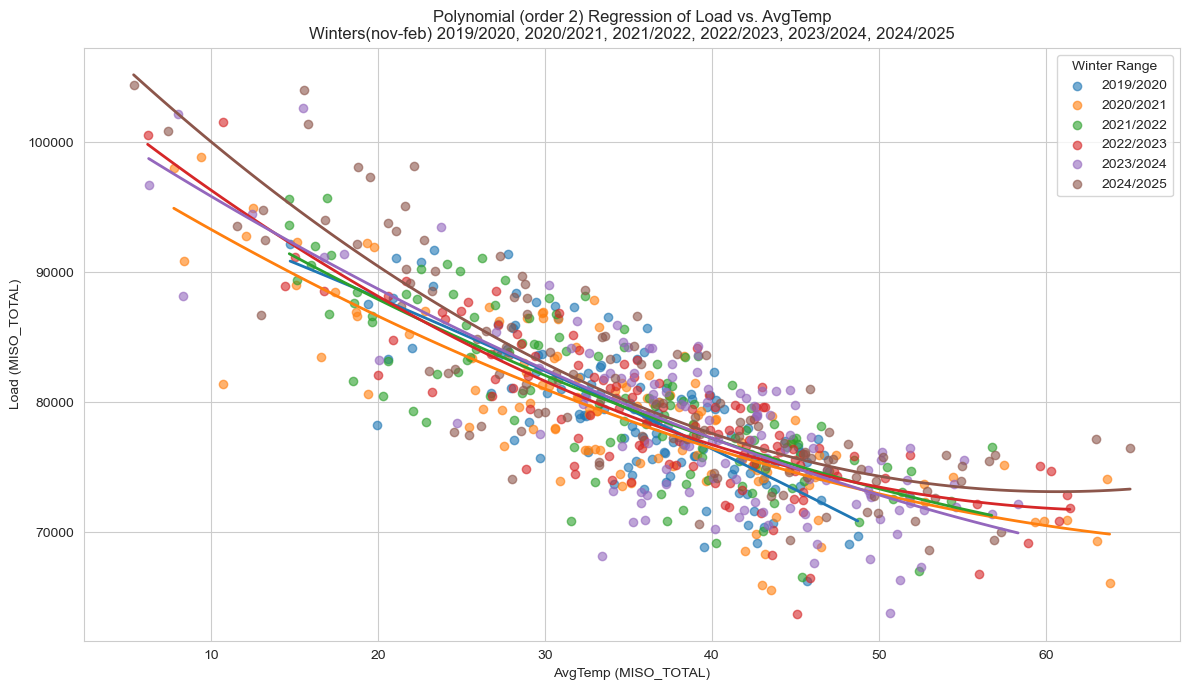

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_load_vs_weather_winter(
    df,
    winters,
    target_region,
    target_variable,
    polynomial_order=2
):
    """
    Plots scatter + polynomial regression of target_region's load vs. 
    target_region's target_variable for specified 'winter' seasons.

    :param df: DataFrame with columns:
               - 'DATE' (datetime),
               - region load columns (e.g. 'COAST', 'EAST', etc.),
               - region weather columns (e.g. 'COAST_MinTemp', etc.),
               - 'YEAR' (int) and 'MONTH' (int) can be added or assumed to exist
    :param winters: list of strings denoting winter ranges in "YYYY/YYYY" format,
                    e.g. ["2018/2019", "2019/2020"].  
                    - "2018/2019" means Nov & Dec 2018 plus Jan & Feb 2019.
    :param target_region: string, e.g. "COAST", "NORTH", etc.
    :param target_variable: string, e.g. "MinTemp", "MaxTemp", "HDD", "CDD", etc.
    :param polynomial_order: order of polynomial fit (int, e.g. 2).
    """

    # Ensure YEAR and MONTH columns exist
    if 'YEAR' not in df.columns or 'MONTH' not in df.columns:
        df['YEAR'] = df['DATE'].dt.year
        df['MONTH'] = df['DATE'].dt.month

    # Column names for x (weather) and y (load)
    weather_col = f'{target_region}_{target_variable}'
    load_col = target_region

    # Set up the figure
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 7))

    # Distinguish each winter by color
    palette = sns.color_palette('tab10', n_colors=len(winters))

    for i, winter_str in enumerate(winters):
        # Parse the "YYYY/YYYY" format
        start_year_str, next_year_str = winter_str.split('/')
        start_year = int(start_year_str)
        end_year = int(next_year_str)

        # Filter the DataFrame for Nov/Dec of start_year and Jan/Feb of end_year
        mask = (
            ((df['YEAR'] == start_year) & (df['MONTH'].isin([11, 12]))) |
            ((df['YEAR'] == end_year) & (df['MONTH'].isin([1, 2])))
        )
        winter_df = df[mask].dropna(subset=[weather_col, load_col])

        if winter_df.empty:
            print(f"No data for winter {winter_str}.")
            continue

        # Scatter plot
        plt.scatter(
            winter_df[weather_col],
            winter_df[load_col],
            alpha=0.6,
            color=palette[i],
            label=winter_str
        )

        # Polynomial regression
        z = np.polyfit(winter_df[weather_col], winter_df[load_col], polynomial_order)
        p = np.poly1d(z)

        # Plot regression line
        x_range = np.linspace(winter_df[weather_col].min(), winter_df[weather_col].max(), 100)
        plt.plot(x_range, p(x_range), color=palette[i], linewidth=2)

    # Labels and title
    plt.xlabel(f'{target_variable} ({target_region})')
    plt.ylabel(f'Load ({target_region})')
    plt.title(f'Polynomial (order {polynomial_order}) Regression of Load vs. {target_variable}\nWinters(nov-feb) {", ".join(winters)}')
    plt.legend(title='Winter Range')
    plt.tight_layout()
    plt.show()



# Example usage:
# Plot load vs. minimum temperature for COAST, comparing two winters:
plot_load_vs_weather_winter(
    df=combined_df,
    winters=["2019/2020", "2020/2021", "2021/2022", "2022/2023", "2023/2024", "2024/2025"],
    target_region="MISO_TOTAL",
    target_variable="AvgTemp",
    polynomial_order=2
)


# Weather adjusted load growth for total MISO and sub regions

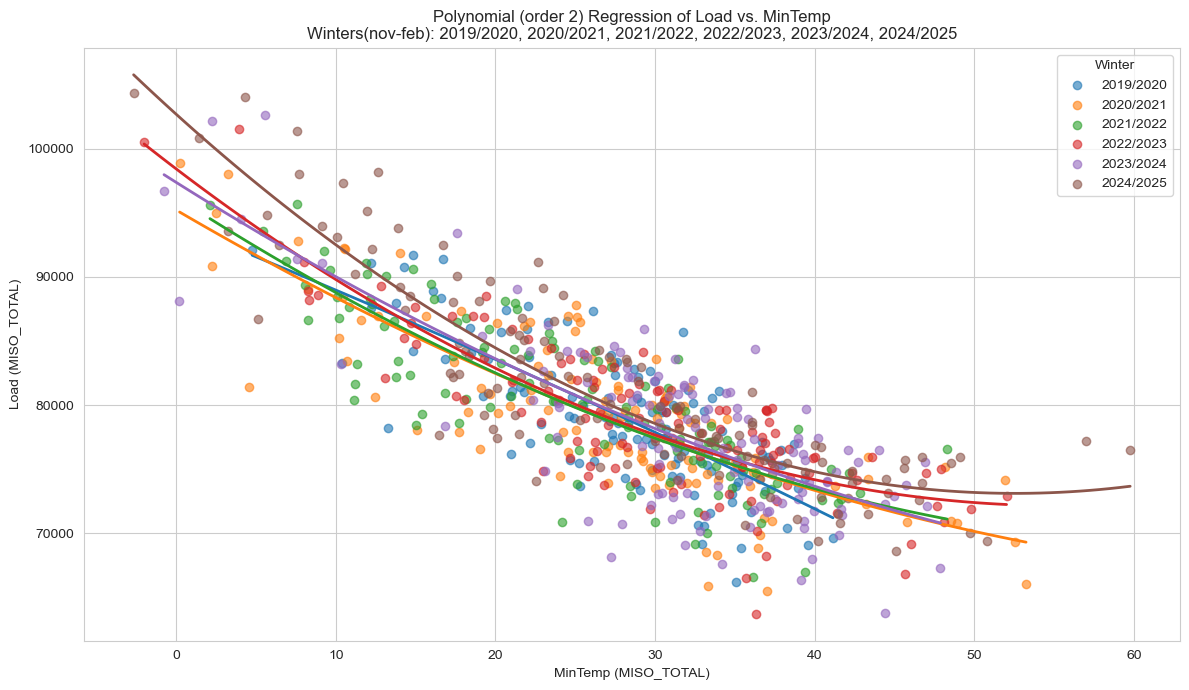

Winter  IntegratedValue  YoY_AbsChange  YoY_PctChange
0  2019/2020     3.428229e+06            NaN            NaN
1  2020/2021     3.470192e+06   41962.402647       1.224026
2  2021/2022     3.479186e+06    8993.779733       0.259172
3  2022/2023     3.514227e+06   35041.518880       1.007176
4  2023/2024     3.499543e+06  -14683.666621      -0.417835
5  2024/2025     3.565703e+06   66159.267910       1.890511

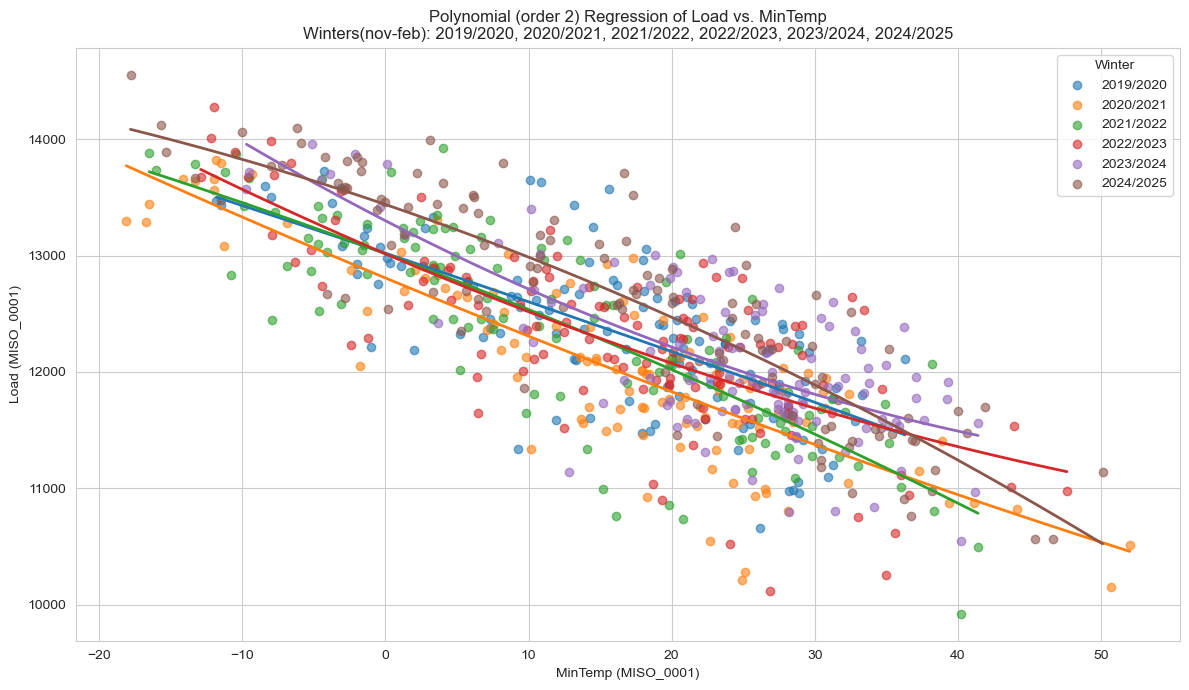

Winter  IntegratedValue  YoY_AbsChange  YoY_PctChange
0  2019/2020    522958.861731            NaN            NaN
1  2020/2021    507898.388441  -15060.473291      -2.879858
2  2021/2022    507997.614517      99.226076       0.019537
3  2022/2023    524175.273398   16177.658881       3.184593
4  2023/2024    530879.461634    6704.188236       1.278997
5  2024/2025    525538.938030   -5340.523604      -1.005977

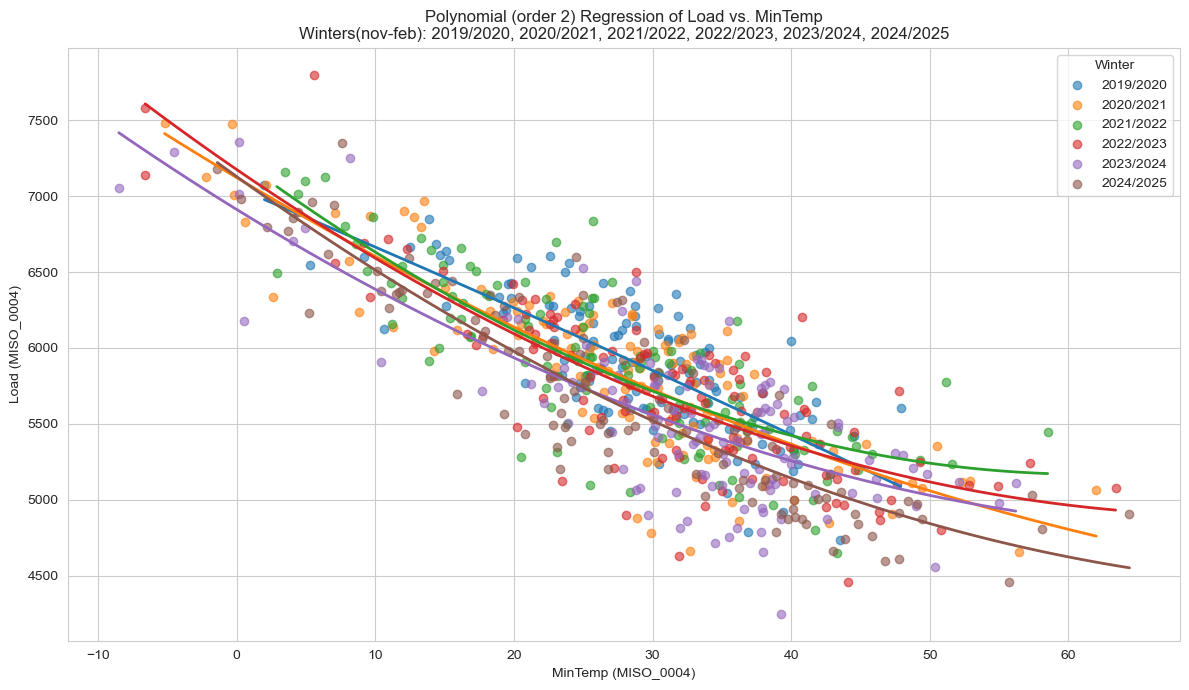

Winter  IntegratedValue  YoY_AbsChange  YoY_PctChange
0  2019/2020    258207.089131            NaN            NaN
1  2020/2021    255400.105012   -2806.984119      -1.087106
2  2021/2022    257644.763780    2244.658768       0.878879
3  2022/2023    254944.384733   -2700.379047      -1.048102
4  2023/2024    249256.136673   -5688.248060      -2.231172
5  2024/2025    246829.109885   -2427.026788      -0.973708

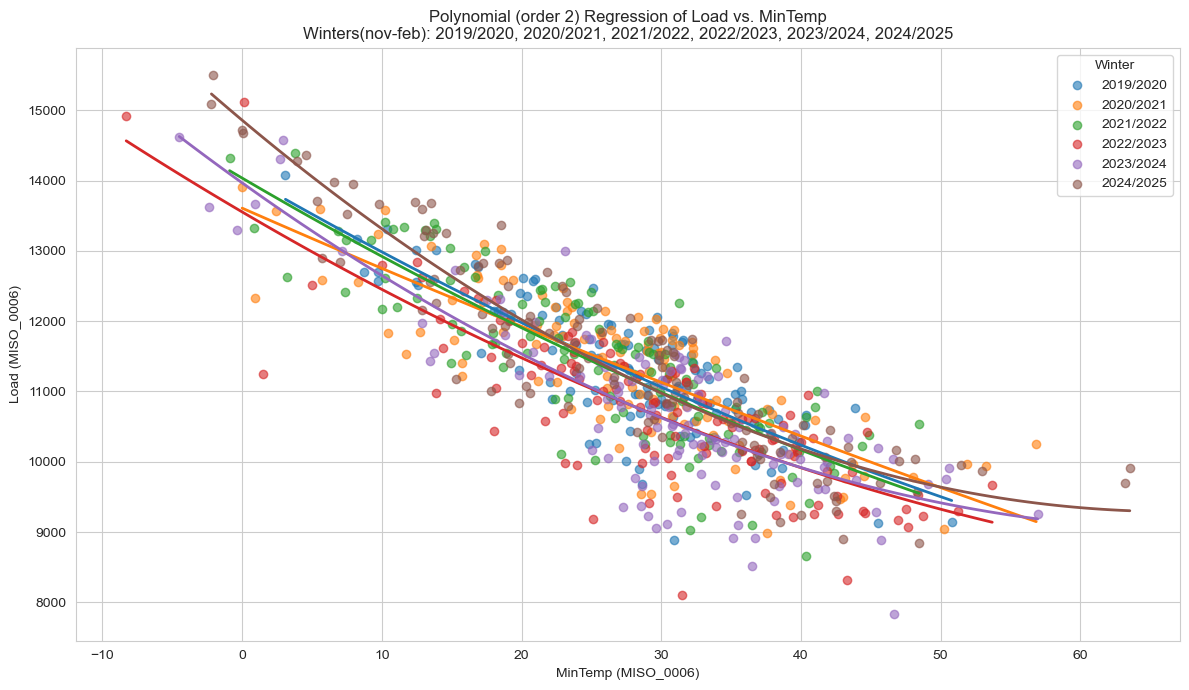

Winter  IntegratedValue  YoY_AbsChange  YoY_PctChange
0  2019/2020    491606.385116            NaN            NaN
1  2020/2021    493319.474524    1713.089408       0.348468
2  2021/2022    488547.687728   -4771.786796      -0.967281
3  2022/2023    474727.158108  -13820.529620      -2.828901
4  2023/2024    477059.023131    2331.865023       0.491201
5  2024/2025    493475.428919   16416.405788       3.441169

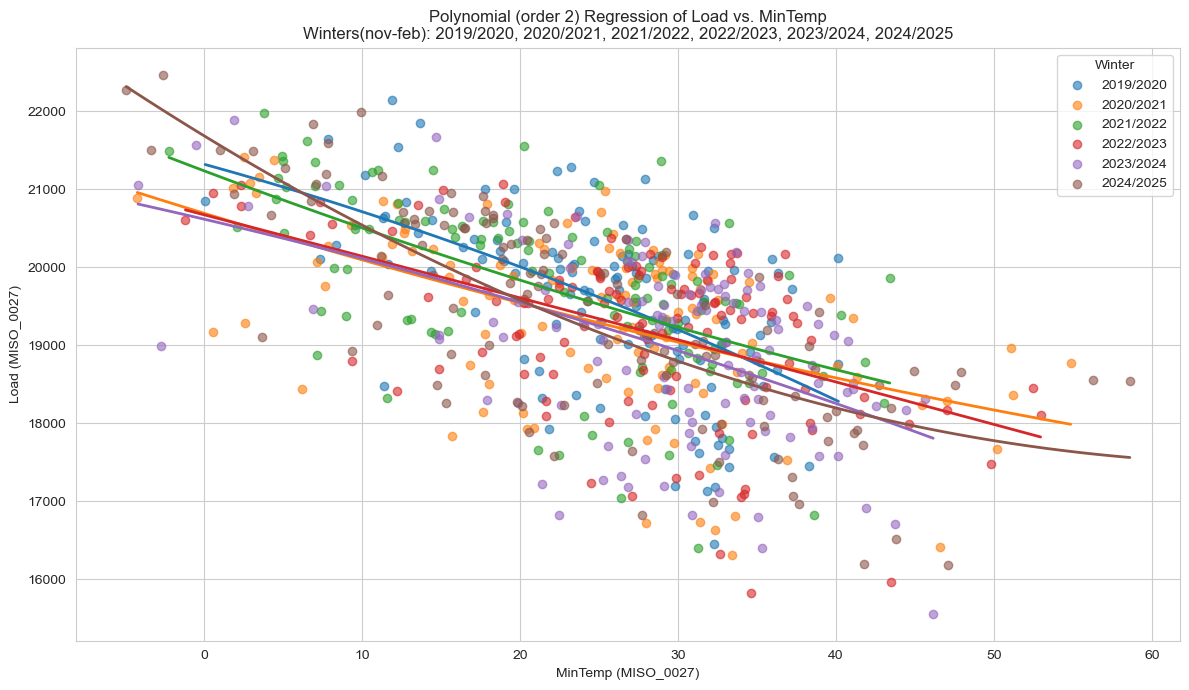

Winter  IntegratedValue  YoY_AbsChange  YoY_PctChange
0  2019/2020    850518.536377            NaN            NaN
1  2020/2021    853244.877534    2726.341157       0.320550
2  2021/2022    861393.785101    8148.907567       0.955049
3  2022/2023    851997.297099   -9396.488002      -1.090847
4  2023/2024    842355.238502   -9642.058597      -1.131701
5  2024/2025    845235.672401    2880.433899       0.341950

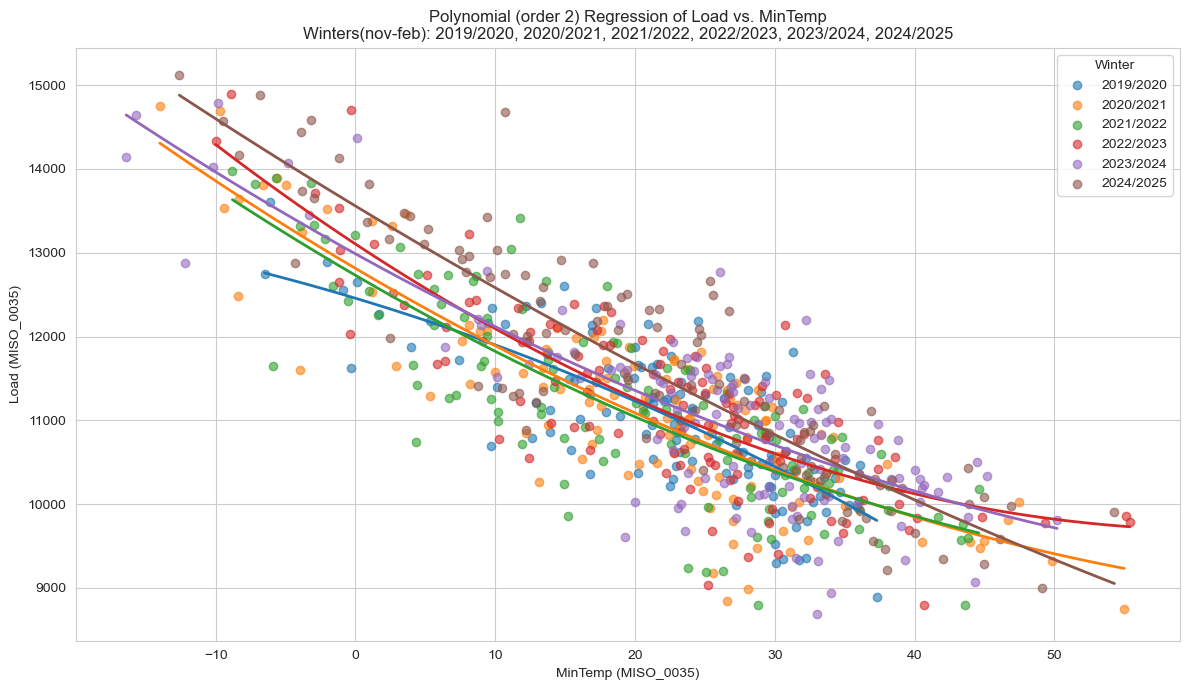

Winter  IntegratedValue  YoY_AbsChange  YoY_PctChange
0  2019/2020    456279.159666            NaN            NaN
1  2020/2021    466115.846649    9836.686983       2.155848
2  2021/2022    465705.906175    -409.940474      -0.087948
3  2022/2023    477730.854841   12024.948666       2.582091
4  2023/2024    479135.515093    1404.660252       0.294028
5  2024/2025    480791.100636    1655.585543       0.345536

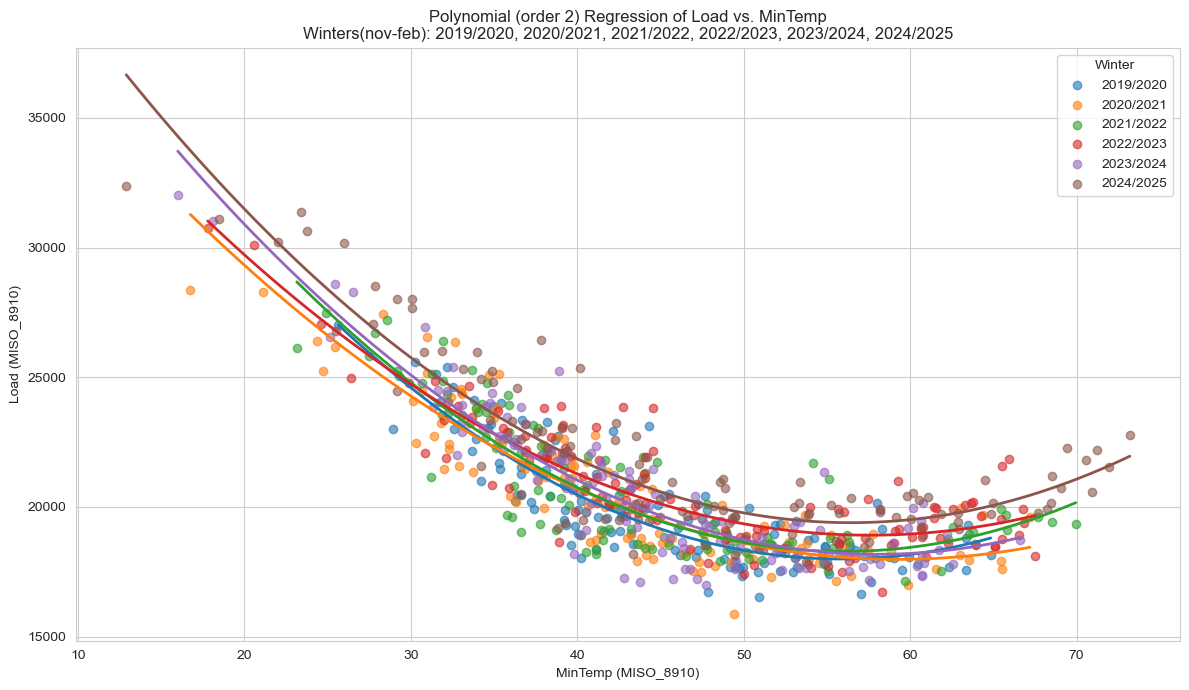

Winter  IntegratedValue  YoY_AbsChange  YoY_PctChange
0  2019/2020     1.127453e+06            NaN            NaN
1  2020/2021     1.102008e+06  -25444.475764      -2.256811
2  2021/2022     1.135283e+06   33275.390684       3.019523
3  2022/2023     1.125790e+06   -9493.474384      -0.836221
4  2023/2024     1.142740e+06   16950.240153       1.505631
5  2024/2025     1.176731e+06   33991.037742       2.974520

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def integrated_load_vs_weather_winter(
    df,
    winters,
    target_region,
    target_variable,
    polynomial_order=2,
    temp_min=20,
    temp_max=70
):
    """
    1. Plots scatter + polynomial regression of (region load) vs (region's target_variable)
       for specified 'winter' seasons.
    2. Integrates each fitted polynomial from temp_min to temp_max (area under the curve).
    3. Compares consecutive winters, computing absolute and percentage differences.
    4. Returns a DataFrame with integrated values and YoY changes.

    Parameters
    ----------
    df : pd.DataFrame
        Must have columns:
          - 'DATE' (datetime)
          - 'YEAR', 'MONTH' (or they will be created)
          - region load column (e.g. 'COAST')
          - region weather column (e.g. 'COAST_MinTemp', etc.)
    winters : list of str
        List of "YYYY/YYYY" strings, e.g. ["2018/2019", "2019/2020"]
        where "2018/2019" means Nov & Dec 2018 plus Jan & Feb 2019
    target_region : str
        E.g. "COAST", "NORTH", etc.
    target_variable : str
        E.g. "AvgTemp", "MinTemp", "MaxTemp", "HDD", etc.
    polynomial_order : int
        Order of polynomial fit (e.g. 2 for quadratic).
    temp_min : float
        Lower bound for integration (default 20°F).
    temp_max : float
        Upper bound for integration (default 70°F).

    Returns
    -------
    pd.DataFrame
        Columns:
          - Winter
          - IntegratedValue (area under the polynomial from temp_min to temp_max)
          - YoY_AbsChange (consecutive absolute change in integrated value)
          - YoY_PctChange (consecutive % change in integrated value)
    """

    # Ensure YEAR and MONTH exist
    if 'YEAR' not in df.columns or 'MONTH' not in df.columns:
        df['YEAR'] = df['DATE'].dt.year
        df['MONTH'] = df['DATE'].dt.month

    weather_col = f'{target_region}_{target_variable}'
    load_col = target_region

    # Prepare the plot
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 7))
    palette = sns.color_palette('tab10', n_colors=len(winters))

    # We'll store the fitted polynomials and their integrated values
    winter_polyfits = {}
    winter_integrals = {}

    sorted_winters = sorted(winters)  # sort for chronological ordering

    for i, winter_str in enumerate(sorted_winters):
        start_year_str, next_year_str = winter_str.split('/')
        start_year = int(start_year_str)
        end_year = int(next_year_str)

        # Filter for Nov/Dec of start_year and Jan/Feb of end_year
        mask = (
            ((df['YEAR'] == start_year) & (df['MONTH'].isin([11, 12]))) |
            ((df['YEAR'] == end_year) & (df['MONTH'].isin([1, 2])))
        )
        winter_df = df[mask].dropna(subset=[weather_col, load_col])

        if winter_df.empty:
            print(f"No data for winter {winter_str}.")
            continue

        # Scatter
        plt.scatter(
            winter_df[weather_col],
            winter_df[load_col],
            alpha=0.6,
            color=palette[i],
            label=winter_str
        )

        # Polynomial fit
        z = np.polyfit(winter_df[weather_col], winter_df[load_col], polynomial_order)
        p = np.poly1d(z)
        winter_polyfits[winter_str] = p

        # Plot regression line
        x_range = np.linspace(winter_df[weather_col].min(), winter_df[weather_col].max(), 100)
        plt.plot(x_range, p(x_range), color=palette[i], linewidth=2)

    # Finalize plot
    plt.xlabel(f'{target_variable} ({target_region})')
    plt.ylabel(f'Load ({target_region})')
    plt.title(
        f'Polynomial (order {polynomial_order}) Regression of Load vs. {target_variable}\n'
        f'Winters(nov-feb): {", ".join(sorted_winters)}'
    )
    plt.legend(title='Winter')
    plt.tight_layout()
    plt.show()

    # -------------------------------------------
    #  Compute Integrals and YoY Differences
    # -------------------------------------------
    data_rows = []
    for winter_str in sorted_winters:
        if winter_str not in winter_polyfits:
            # If no polynomial (empty data), store NaNs
            data_rows.append({
                'Winter': winter_str,
                'IntegratedValue': np.nan,
                'YoY_AbsChange': np.nan,
                'YoY_PctChange': np.nan
            })
            continue

        p = winter_polyfits[winter_str]
        p_int = p.integ()  # indefinite integral
        area = p_int(temp_max) - p_int(temp_min)  # definite integral in [temp_min, temp_max]
        winter_integrals[winter_str] = area

    # Now build a DataFrame with consecutive comparisons
    prev_winter = None
    for winter_str in sorted_winters:
        if winter_str not in winter_integrals:
            # store row with no data
            data_rows.append({
                'Winter': winter_str,
                'IntegratedValue': np.nan,
                'YoY_AbsChange': np.nan,
                'YoY_PctChange': np.nan
            })
            continue

        current_area = winter_integrals[winter_str]
        if prev_winter is None or (prev_winter not in winter_integrals):
            # first winter => no yoy comparison
            yoy_abs = np.nan
            yoy_pct = np.nan
        else:
            prev_area = winter_integrals[prev_winter]
            if pd.isna(prev_area) or prev_area == 0:
                yoy_abs = np.nan
                yoy_pct = np.nan
            else:
                yoy_abs = current_area - prev_area
                yoy_pct = (yoy_abs / prev_area) * 100

        data_rows.append({
            'Winter': winter_str,
            'IntegratedValue': current_area,
            'YoY_AbsChange': yoy_abs,
            'YoY_PctChange': yoy_pct
        })

        prev_winter = winter_str

    # Build final results DataFrame
    # We might have duplicates for each winter if we appended rows in the first loop
    # and second loop. To avoid that, we'll create a dictionary in a single pass:
    # but it's okay if you prefer a simpler approach. We'll handle it carefully:

    # We can do a simpler approach: just create in second loop. So let's revise:
    # We'll only create the final rows in the second loop, so we don't have duplicates.

    # Let's do that approach below, rewriting final steps more cleanly:

    final_data = []
    prev_winter = None
    for winter_str in sorted_winters:
        if winter_str not in winter_integrals:
            # no data => store NaN
            final_data.append({
                'Winter': winter_str,
                'IntegratedValue': np.nan,
                'YoY_AbsChange': np.nan,
                'YoY_PctChange': np.nan
            })
            continue

        current_area = winter_integrals[winter_str]
        if (prev_winter is None) or (prev_winter not in winter_integrals):
            yoy_abs = np.nan
            yoy_pct = np.nan
        else:
            prev_area = winter_integrals[prev_winter]
            if pd.isna(prev_area) or prev_area == 0:
                yoy_abs = np.nan
                yoy_pct = np.nan
            else:
                yoy_abs = current_area - prev_area
                yoy_pct = (yoy_abs / prev_area) * 100

        final_data.append({
            'Winter': winter_str,
            'IntegratedValue': current_area,
            'YoY_AbsChange': yoy_abs,
            'YoY_PctChange': yoy_pct
        })

        prev_winter = winter_str

    results_df = pd.DataFrame(final_data)
    # For clarity, let's keep the same order as sorted_winters
    results_df = results_df.set_index('Winter').reindex(sorted_winters).reset_index()

    return results_df




regions = ["MISO_TOTAL","MISO_0001", "MISO_0004", "MISO_0006", "MISO_0027", "MISO_0035", "MISO_8910"]


for region in regions: 
    # Example usage:
    winters_list = ["2019/2020", "2020/2021", "2021/2022", "2022/2023", "2023/2024", "2024/2025"]
    results_df = integrated_load_vs_weather_winter(
        df=combined_df,
        winters=winters_list,
        target_region=region,
        target_variable="MinTemp",
        polynomial_order=2,
        temp_min=10,
        temp_max=55
    )
    display(results_df)




# Year by year ranges

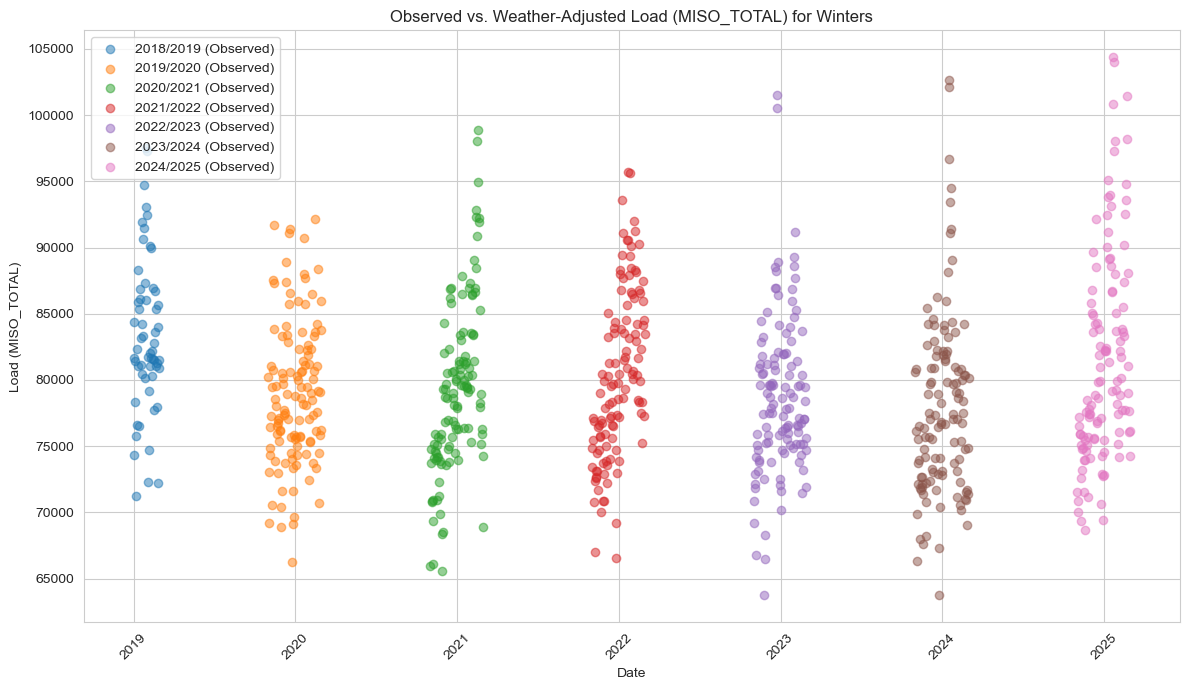

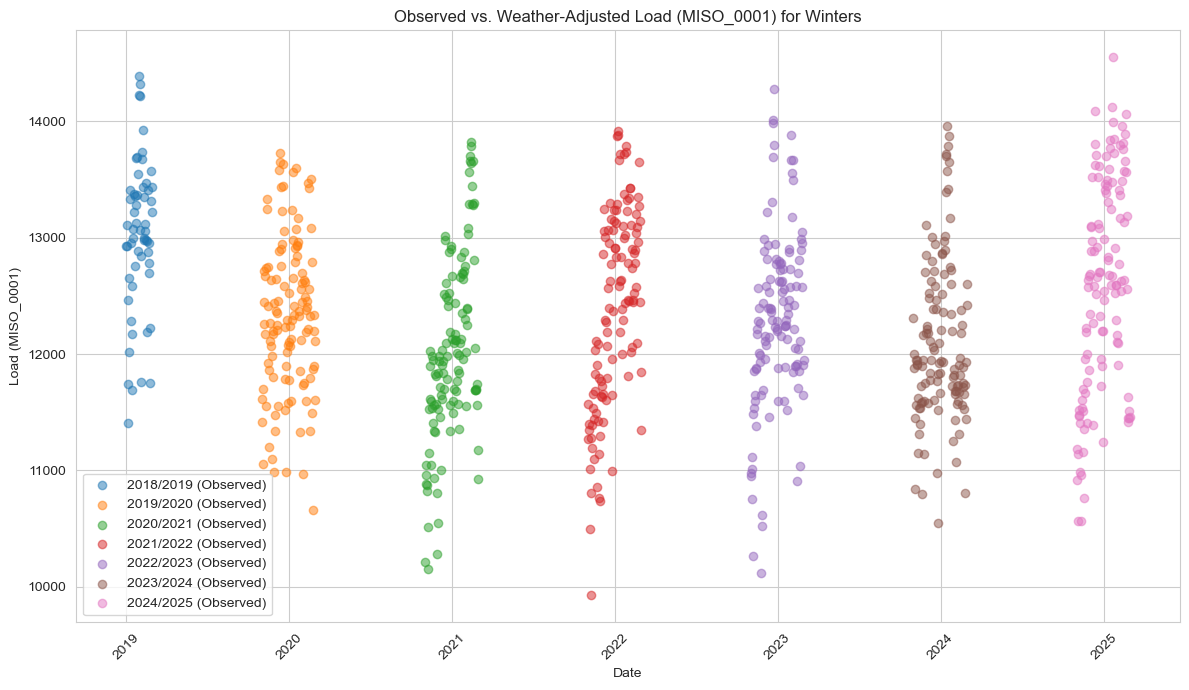

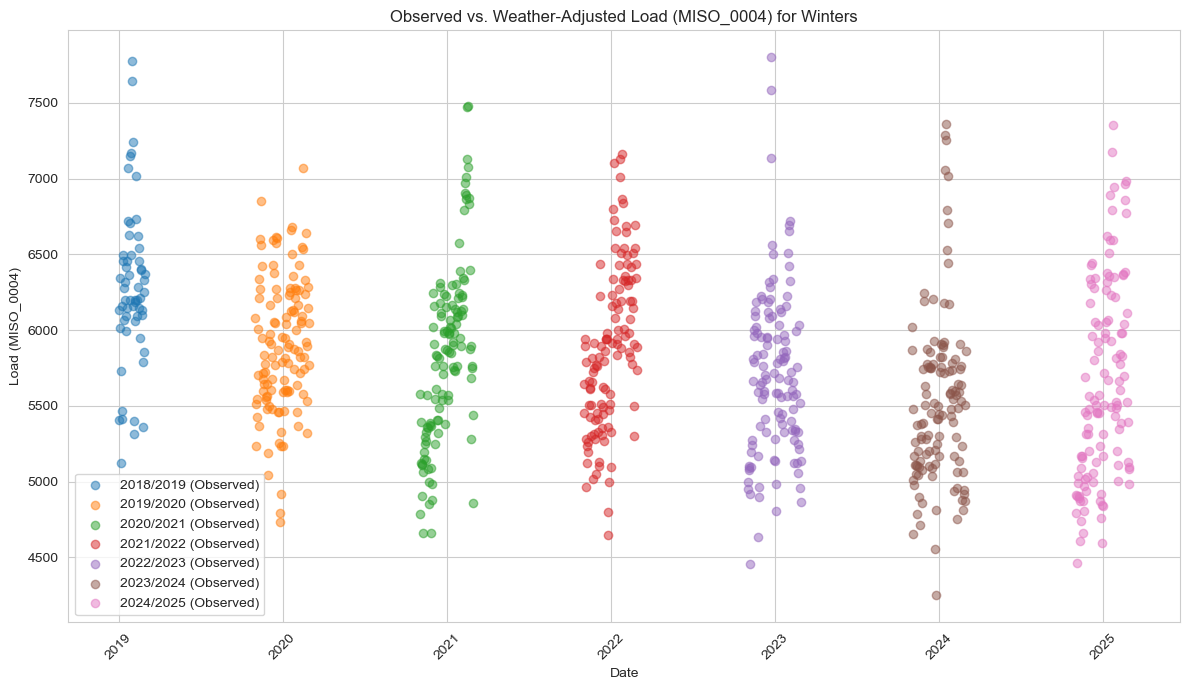

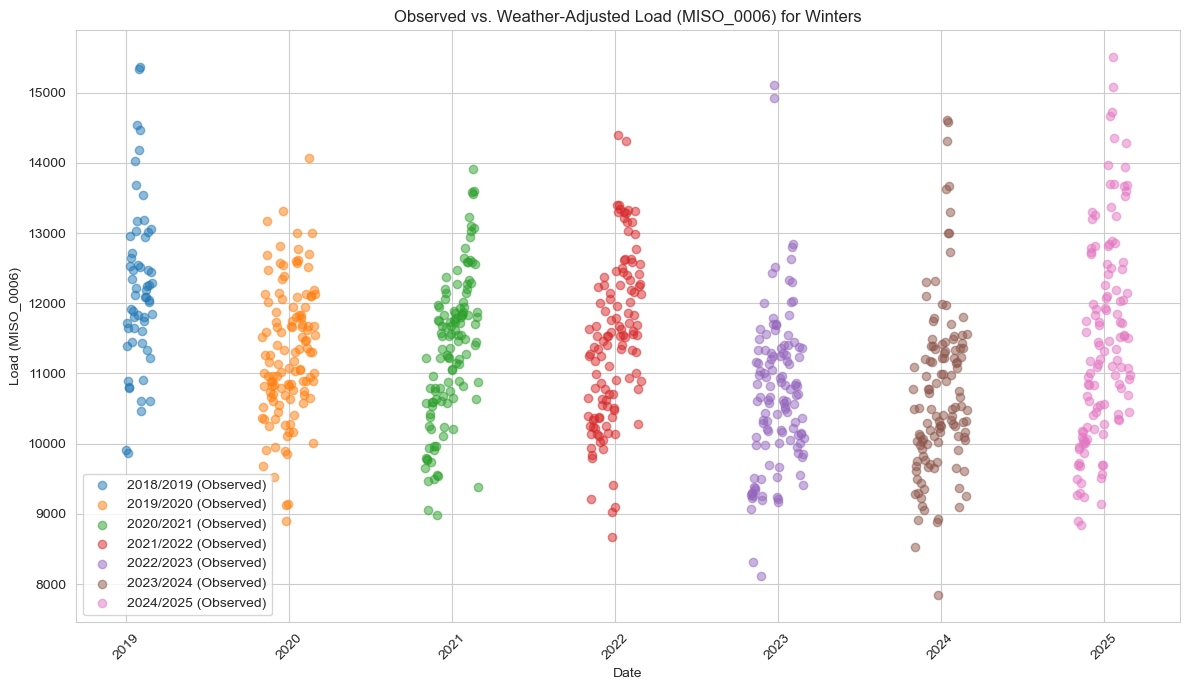

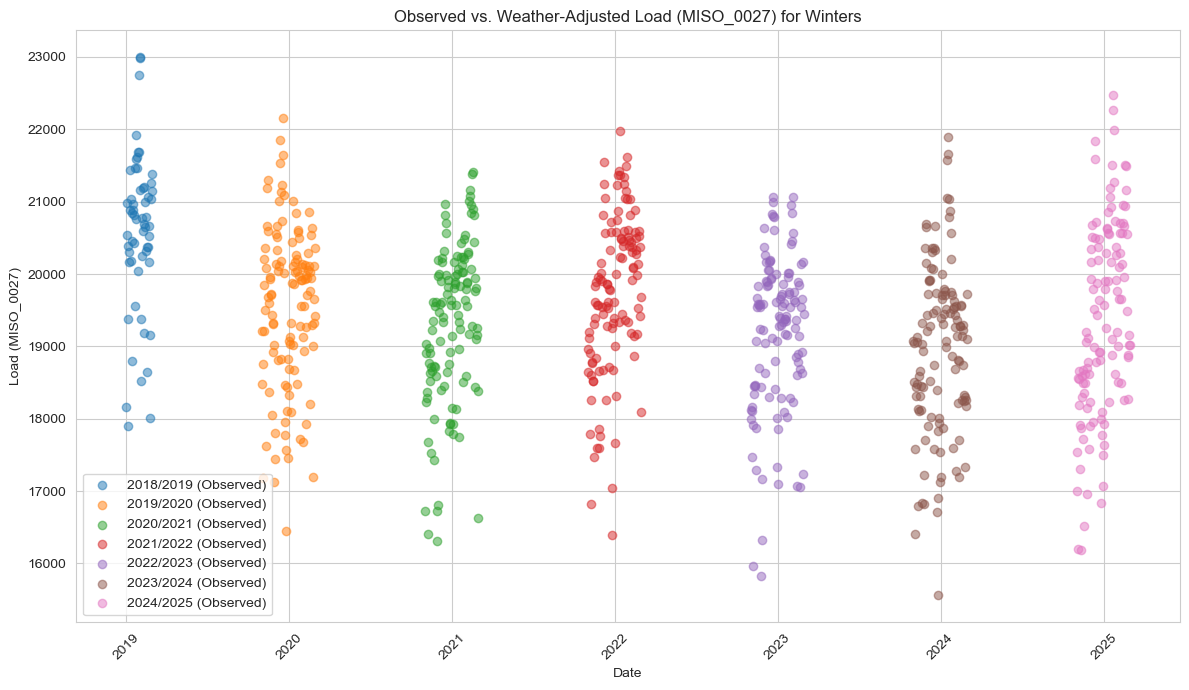

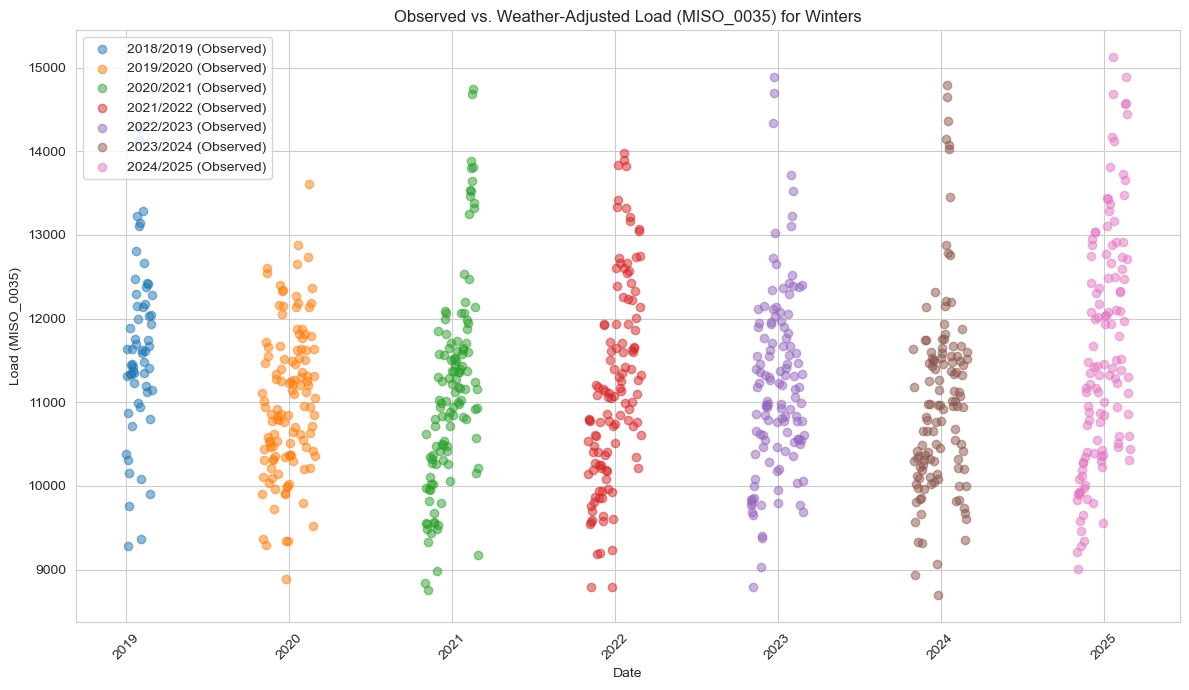

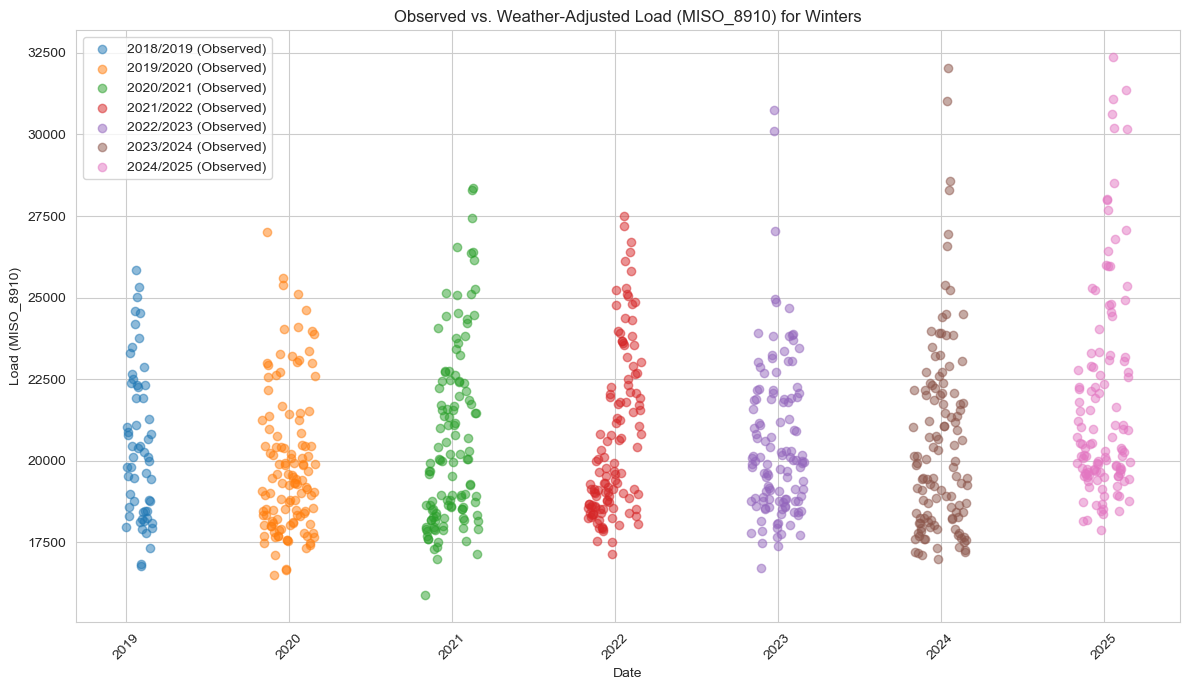

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def analyze_winter_load(df, region, weather_var, poly_order=2):
    # Define relevant columns
    weather_col = f'{region}_{weather_var}'
    load_col = region
    
    # Convert DATE column to datetime if not already
    df['DATE'] = pd.to_datetime(df['DATE'])
    df['MONTH'] = df['DATE'].dt.month
    df['YEAR'] = df['DATE'].dt.year

    # Identify winter years (Nov - Feb spans two years)
    df['Winter_Year'] = np.where(df['MONTH'] >= 11, 
                                 df['YEAR'], 
                                 df['YEAR'] - 1)
    
    df['Winter_Label'] = df['Winter_Year'].astype(str) + "/" + (df['Winter_Year'] + 1).astype(str)

    # Filter for only winter months (Nov-Feb)
    winter_df = df[df['MONTH'].isin([11, 12, 1, 2])].dropna(subset=[weather_col, load_col])

    # Polynomial regression to estimate weather-adjusted load
    X = winter_df[[weather_col]]
    y = winter_df[load_col]

    poly = PolynomialFeatures(poly_order)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

    # Predict adjusted load
    winter_df['Weather_Adjusted_Load'] = model.predict(X_poly)

    # Plot each winter separately
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 7))

    unique_winters = sorted(winter_df['Winter_Label'].unique())
    colors = sns.color_palette('tab10', n_colors=len(unique_winters))

    for i, winter in enumerate(unique_winters):
        subset = winter_df[winter_df['Winter_Label'] == winter]
        
        plt.scatter(subset['DATE'], subset[load_col], alpha=0.5, label=f"{winter} (Observed)", color=colors[i])
        # plt.plot(subset['DATE'], subset['Weather_Adjusted_Load'], linestyle="dashed", linewidth=2, label=f"{winter} (Adjusted)", color=colors[i])

    plt.xlabel('Date')
    plt.ylabel(f'Load ({region})')
    plt.title(f'Observed vs. Weather-Adjusted Load ({region}) for Winters')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return winter_df


regions = ["MISO_TOTAL","MISO_0001", "MISO_0004", "MISO_0006", "MISO_0027", "MISO_0035", "MISO_8910"]


for region in regions:
# Example usage
    winter_data = analyze_winter_load(combined_df, region=region, weather_var='AvgTemp', poly_order=2)


# Below are YoY load changes vs Avg Temp

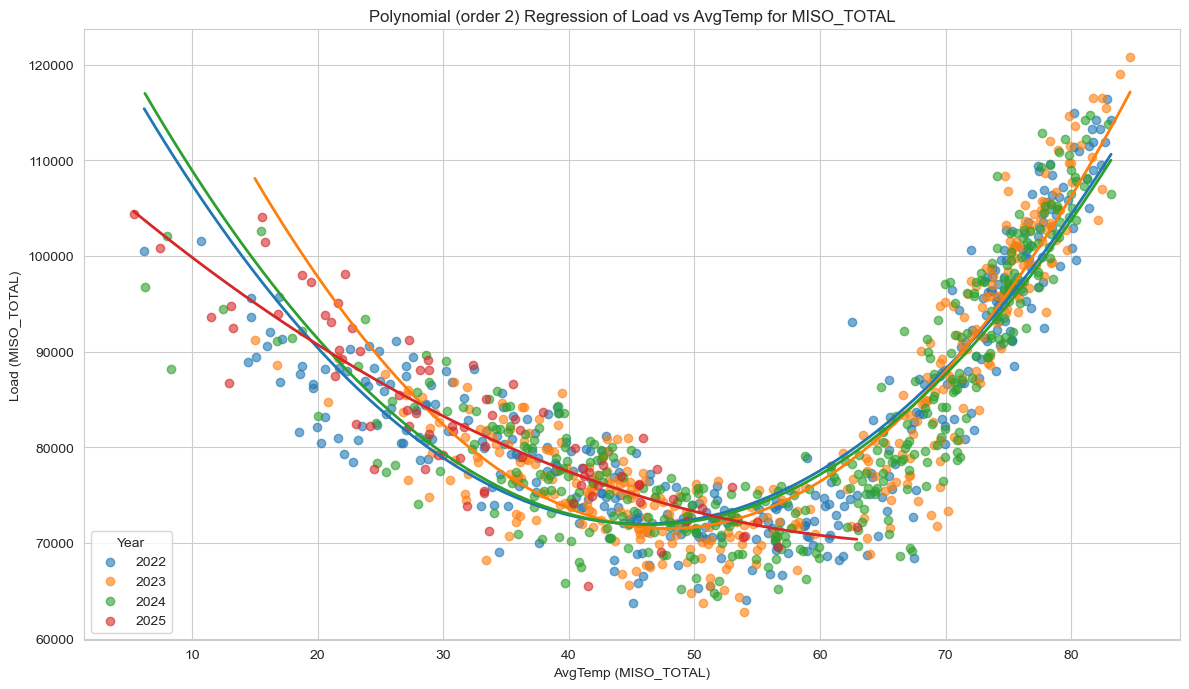

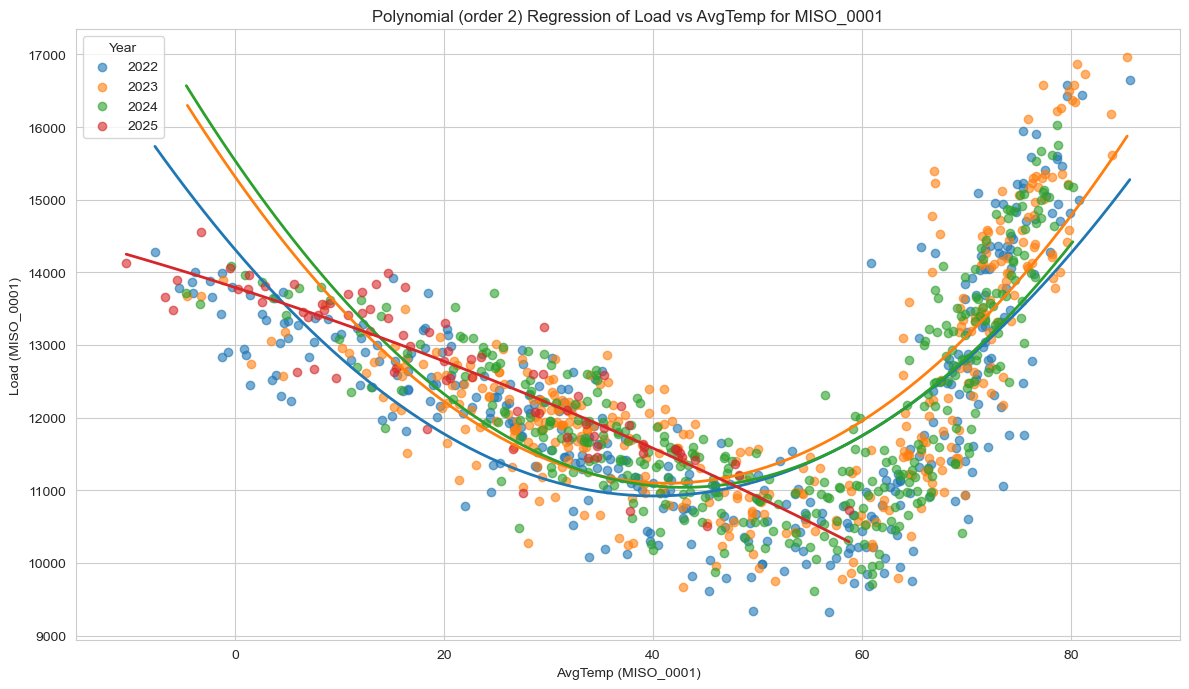

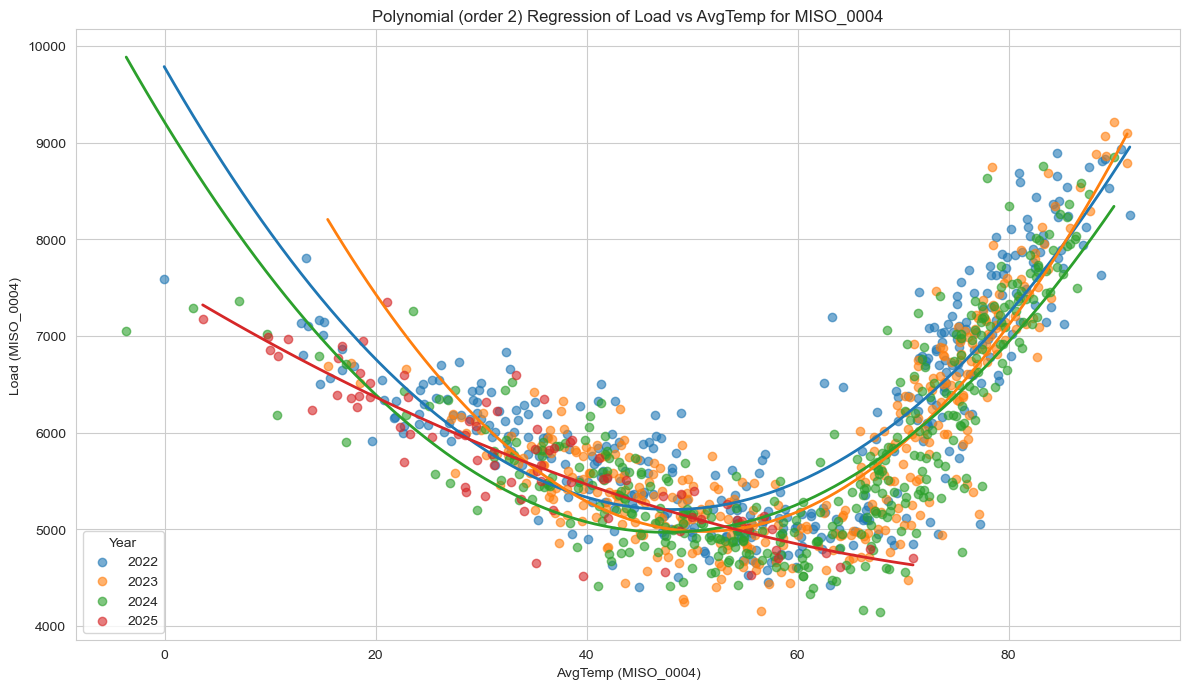

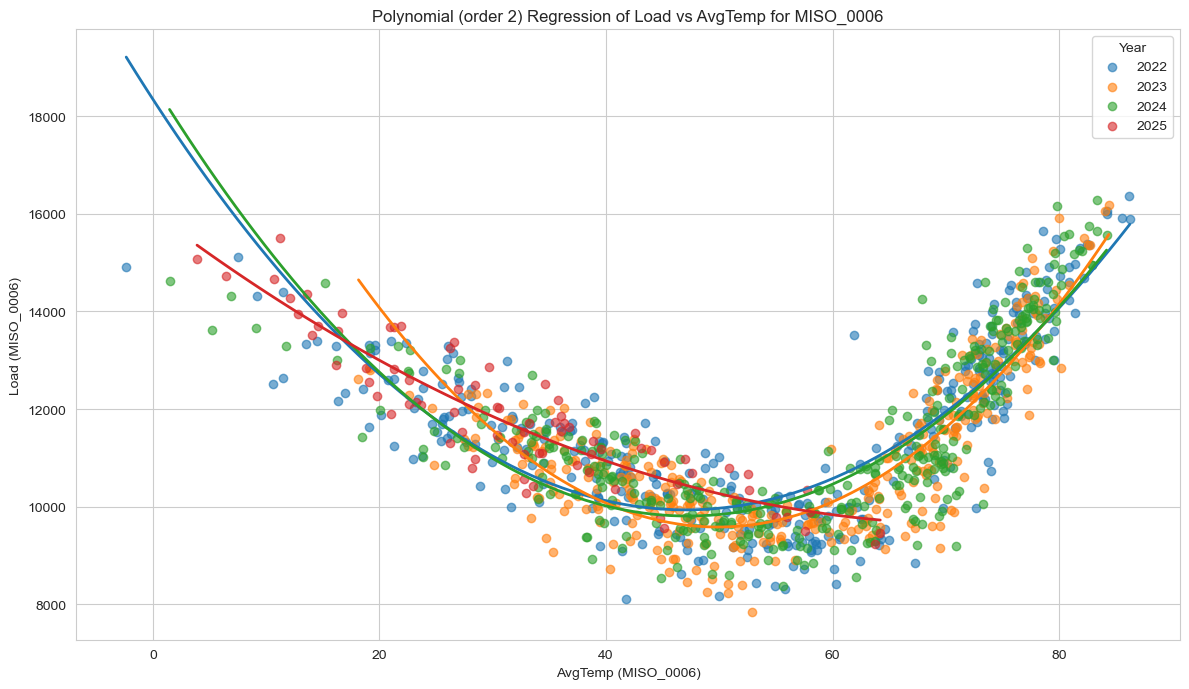

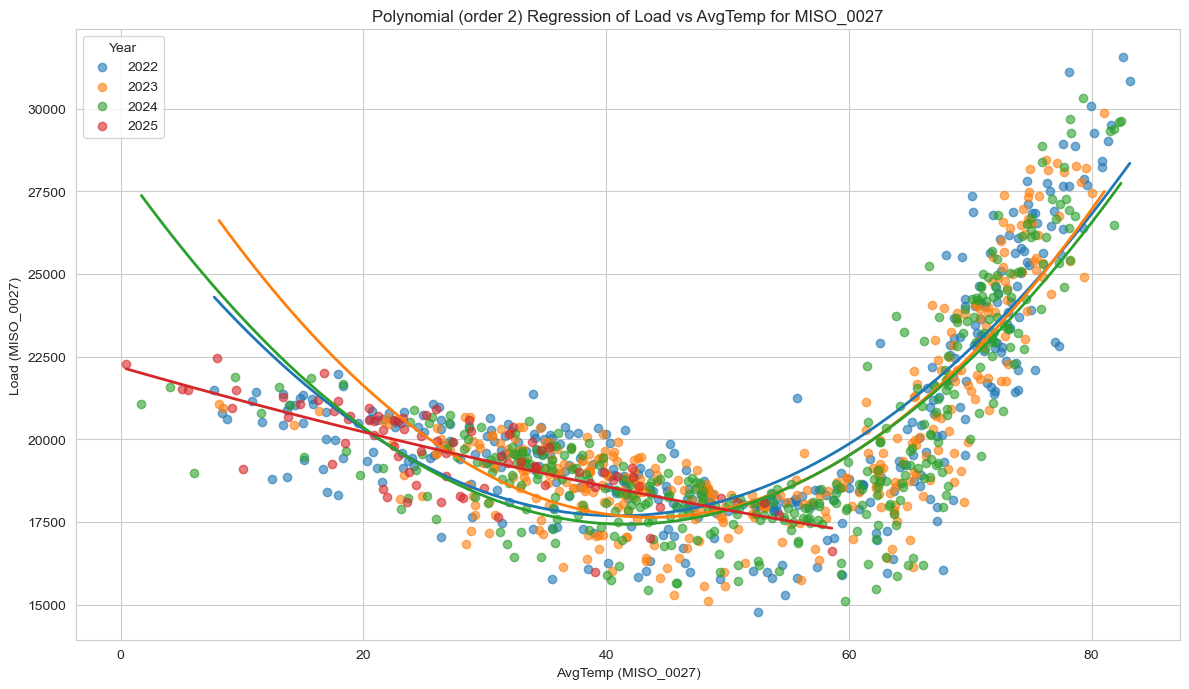

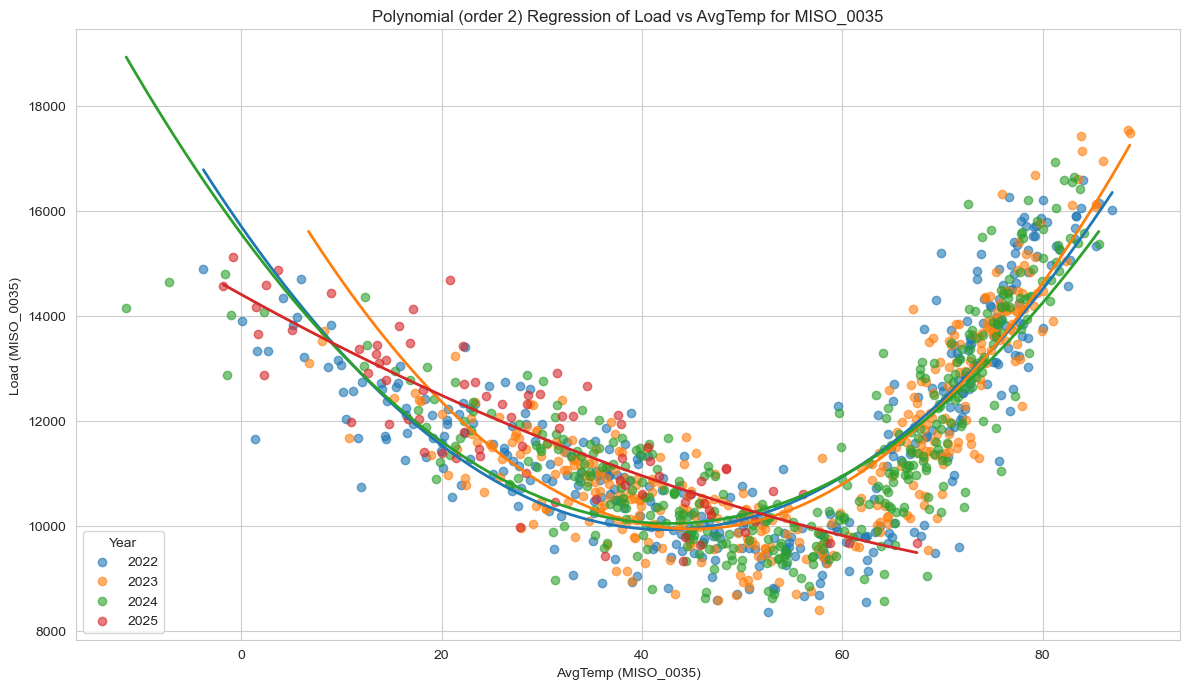

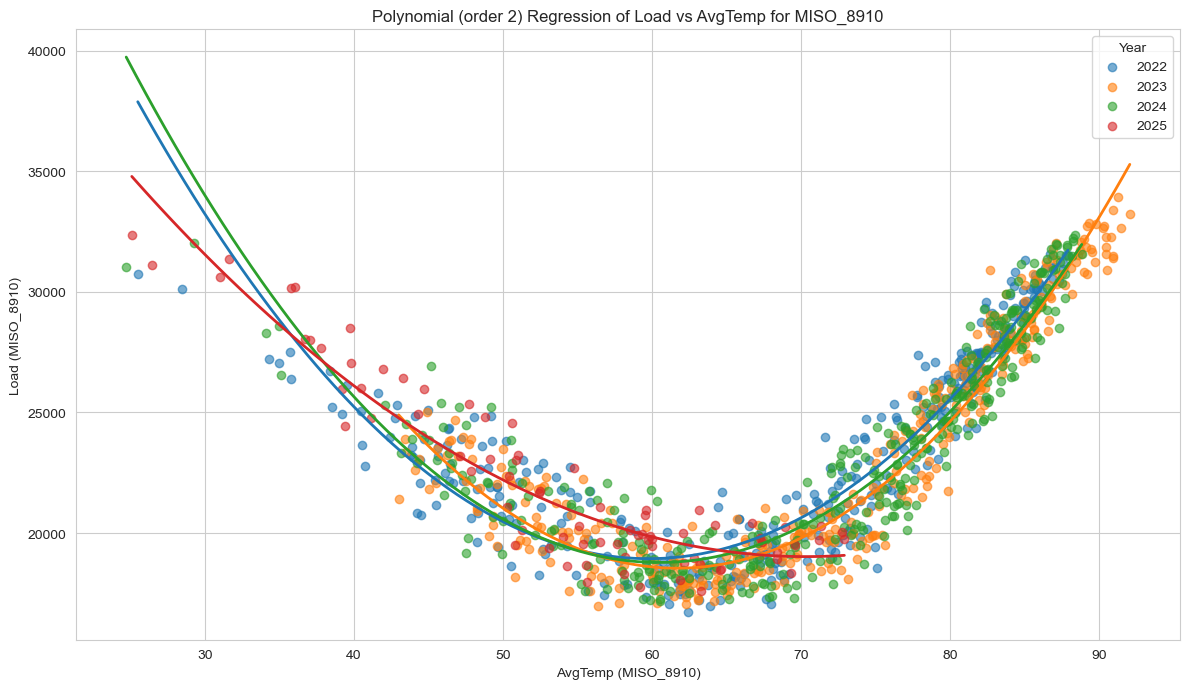

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_load_vs_weather(df, target_region, target_variable, polynomial_order=2, years=None, months=None):
    # Column names
    weather_col = f'{target_region}_{target_variable}'
    load_col = target_region

    # Extract year and month from DATE column
    df['YEAR'] = df['DATE'].dt.year
    df['MONTH'] = df['DATE'].dt.month

    # Filter based on years and months if provided
    if years is not None:
        df = df[df['YEAR'].isin(years)]
    if months is not None:
        df = df[df['MONTH'].isin(months)]

    # Set up plot aesthetics
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 7))

    unique_years = sorted(df['YEAR'].unique())
    colors = sns.color_palette('tab10', n_colors=len(unique_years))

    for i, year in enumerate(unique_years):
        yearly_data = df[df['YEAR'] == year].dropna(subset=[weather_col, load_col])

        # Scatter plot
        plt.scatter(
            yearly_data[weather_col],
            yearly_data[load_col],
            alpha=0.6,
            color=colors[i],
            label=f'{year}'
        )

        # Polynomial regression
        z = np.polyfit(yearly_data[weather_col], yearly_data[load_col], polynomial_order)
        p = np.poly1d(z)

        # Plot regression line
        x_range = np.linspace(yearly_data[weather_col].min(), yearly_data[weather_col].max(), 100)
        plt.plot(x_range, p(x_range), color=colors[i], linewidth=2)

    # Labels and title
    plt.xlabel(f'{target_variable} ({target_region})')
    plt.ylabel(f'Load ({target_region})')
    plt.title(f'Polynomial (order {polynomial_order}) Regression of Load vs {target_variable} for {target_region}')
    plt.legend(title='Year')
    plt.tight_layout()
    plt.show()


regions = ["MISO_TOTAL","MISO_0001", "MISO_0004", "MISO_0006", "MISO_0027", "MISO_0035", "MISO_8910"]


# Example usage:
# plot_load_vs_weather(combined_df, 'PJM_TOTAL', 'AvgTemp', polynomial_order=2, years=[2022,2023,2024,2025], months=[1,2,3,4,5,6,7,8,9,10,11,12])

for region in regions:
    plot_load_vs_weather(combined_df, region, 'AvgTemp', polynomial_order=2, years=[2022,2023,2024,2025], months=[1,2,3,4,5,6,7,8,9,10,11,12])


In [21]:
import requests
import pandas as pd

def fetch_all_data():
    base_url = "https://api.eia.gov/v2/electricity/rto/daily-fuel-type-data/data/"
    api_key = "QPB6iXLFXYLNVdz2nhVAqFnbD6dVQjb5vNSKTANC"
    
    params = {
        "frequency": "daily",
        "data[0]": "value",
        # Note: Some fueltype values are repeated as provided.
        "facets[fueltype][]": [
            "BAT", "BAT", "COL", "GEO", "NG", "NUC", "OES", "OIL", "OTH",
            "PS", "PS", "SNB", "SNB", "SUN", "UES", "UES", "UNK", "WAT", "WNB", "WND"
        ],
        "facets[respondent][]": ["MISO"],
        "start": "2019-01-01",
        "end": "2025-03-20",
        "sort[0][column]": "period",
        "sort[0][direction]": "desc",
        "offset": 0,
        "length": 5000,
        "api_key": api_key
    }
    
    # Initial API call
    response = requests.get(base_url, params=params)
    response.raise_for_status()
    json_data = response.json()
    
    total = int(json_data["response"]["total"])
    all_data = json_data["response"]["data"]
    print(f"Total rows to fetch: {total}")
    
    # Paginate if needed
    offset = 5000
    while offset < total:
        print(f"Fetching offset: {offset}")
        params["offset"] = offset
        response = requests.get(base_url, params=params)
        response.raise_for_status()
        page_data = response.json()["response"]["data"]
        if not page_data:
            break
        all_data.extend(page_data)
        offset += 5000
        
    return all_data

# Fetch data and load into DataFrame
data = fetch_all_data()
df = pd.DataFrame(data)

# Convert 'period' to datetime and 'value' to numeric
df['period'] = pd.to_datetime(df['period'], errors='coerce')
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# Pivot the DataFrame so that each row is a single day (period)
# and each fueltype becomes its own column.
# In case of duplicates, we use the first value.
pivot_df = df.pivot_table(index='period', columns='fueltype', values='value', aggfunc='first')

# Reset index so that period becomes a column, and rename it to 'DATE' if desired.
pivot_df = pivot_df.reset_index().rename(columns={'period': 'DATE'})

# Display a sample of the pivoted DataFrame
print(pivot_df.head())

# Optionally, save the pivoted data to a CSV file
pivot_df


Total rows to fetch: 79787
Fetching offset: 5000
Fetching offset: 10000
Fetching offset: 15000
Fetching offset: 20000
Fetching offset: 25000
Fetching offset: 30000
Fetching offset: 35000
Fetching offset: 40000
Fetching offset: 45000
Fetching offset: 50000
Fetching offset: 55000
Fetching offset: 60000
Fetching offset: 65000
Fetching offset: 70000
Fetching offset: 75000
fueltype       DATE  BAT       COL        NG       NUC  OIL      OTH     SUN  \
0        2019-01-01  NaN  751494.0  284749.0  292014.0  NaN  25631.0   587.0   
1        2019-01-02  NaN  786577.0  323670.0  299416.0  NaN  25054.0   290.0   
2        2019-01-03  NaN  727527.0  357001.0  308754.0  NaN  24662.0   562.0   
3        2019-01-04  NaN  766036.0  399641.0  293468.0  NaN  25057.0   844.0   
4        2019-01-05  NaN  712251.0  341160.0  269515.0  NaN  22560.0  1467.0   

fueltype      WAT       WND  
0         25534.0  109073.0  
1         27154.0  225828.0  
2         28114.0  270184.0  
3         24960.0  157141.0 

fueltype       DATE    BAT       COL        NG       NUC  OIL      OTH  \
0        2019-01-01    NaN  751494.0  284749.0  292014.0  NaN  25631.0   
1        2019-01-02    NaN  786577.0  323670.0  299416.0  NaN  25054.0   
2        2019-01-03    NaN  727527.0  357001.0  308754.0  NaN  24662.0   
3        2019-01-04    NaN  766036.0  399641.0  293468.0  NaN  25057.0   
4        2019-01-05    NaN  712251.0  341160.0  269515.0  NaN  22560.0   
...             ...    ...       ...       ...       ...  ...      ...   
2266     2025-03-16 -140.0  347055.0  391380.0  259318.0  NaN   6137.0   
2267     2025-03-17  195.0  354184.0  441817.0  259089.0  NaN   6106.0   
2268     2025-03-18 -104.0  358816.0  381879.0  258097.0  NaN   5830.0   
2269     2025-03-19   98.0  378330.0  378275.0  248637.0  NaN   6185.0   
2270     2025-03-20 -328.0  403856.0  423439.0  243638.0  NaN   6678.0   

fueltype      SUN      WAT       WND  
0           587.0  25534.0  109073.0  
1           290.0  27154.0  225828.0  
2           562.0  28114.0  270184.0  
3           844.0  24960.0  157141.0  
4          1467.0  23120.0  147883.0  
...           ...      ...       ...  
2266      70896.0  32518.0  371474.0  
2267      98586.0  34722.0  430141.0  
2268      86845.0  33258.0  433511.0  
2269      46510.0  28656.0  491780.0  
2270      89308.0  31315.0  402221.0  

[2271 rows x 10 columns]

In [22]:
import pandas as pd

# Ensure the pivoted DataFrame has no index/column name (drop "fueltype" if present)
pivot_df.index.name = None
pivot_df.columns.name = None

# Identify the fuel type columns (all columns except 'DATE')
fuel_cols = pivot_df.columns.drop('DATE')

# Compute total generation per row using the fuel type columns
pivot_df['TOTAL_GEN'] = pivot_df[fuel_cols].sum(axis=1)

# For each fuel type, create a new column showing its percentage of total generation
for col in fuel_cols:
    new_col = f"{col}RATIO"
    pivot_df[new_col] = (pivot_df[col] / pivot_df['TOTAL_GEN']) * 100

# Optionally, drop the temporary TOTAL_GEN column if not needed
pivot_df = pivot_df.drop(columns='TOTAL_GEN')

# Display the updated DataFrame
pivot_df


DATE    BAT       COL        NG       NUC  OIL      OTH      SUN  \
0    2019-01-01    NaN  751494.0  284749.0  292014.0  NaN  25631.0    587.0   
1    2019-01-02    NaN  786577.0  323670.0  299416.0  NaN  25054.0    290.0   
2    2019-01-03    NaN  727527.0  357001.0  308754.0  NaN  24662.0    562.0   
3    2019-01-04    NaN  766036.0  399641.0  293468.0  NaN  25057.0    844.0   
4    2019-01-05    NaN  712251.0  341160.0  269515.0  NaN  22560.0   1467.0   
...         ...    ...       ...       ...       ...  ...      ...      ...   
2266 2025-03-16 -140.0  347055.0  391380.0  259318.0  NaN   6137.0  70896.0   
2267 2025-03-17  195.0  354184.0  441817.0  259089.0  NaN   6106.0  98586.0   
2268 2025-03-18 -104.0  358816.0  381879.0  258097.0  NaN   5830.0  86845.0   
2269 2025-03-19   98.0  378330.0  378275.0  248637.0  NaN   6185.0  46510.0   
2270 2025-03-20 -328.0  403856.0  423439.0  243638.0  NaN   6678.0  89308.0   

          WAT       WND  BATRATIO   COLRATIO    NGRATIO   NUCRATIO  OILRATIO  \
0     25534.0  109073.0       NaN  50.466932  19.122453  19.610337       NaN   
1     27154.0  225828.0       NaN  46.598467  19.174888  17.738030       NaN   
2     28114.0  270184.0       NaN  42.376823  20.794511  17.984231       NaN   
3     24960.0  157141.0       NaN  45.948918  23.971551  17.603007       NaN   
4     23120.0  147883.0       NaN  46.921716  22.474960  17.755126       NaN   
...       ...       ...       ...        ...        ...        ...       ...   
2266  32518.0  371474.0 -0.009468  23.471262  26.468953  17.537626       NaN   
2267  34722.0  430141.0  0.012001  21.798085  27.191416  15.945508       NaN   
2268  33258.0  433511.0 -0.006675  23.028601  24.508771  16.564514       NaN   
2269  28656.0  491780.0  0.006209  23.968131  23.964647  15.751762       NaN   
2270  31315.0  402221.0 -0.020498  25.238997  26.462837  15.226166       NaN   

      OTHRATIO  SUNRATIO  WATRATIO   WNDRATIO  
0     1.721262  0.039420  1.714748   7.324848  
1     1.484251  0.017180  1.608660  13.378523  
2     1.436506  0.032735  1.637578  15.737615  
3     1.502987  0.050625  1.497169   9.425744  
4     1.486209  0.096643  1.523101   9.742245  
...        ...       ...       ...        ...  
2266  0.415044  4.794683  2.199186  25.122714  
2267  0.375791  6.067428  2.136949  26.472822  
2268  0.374166  5.573661  2.134479  27.822482  
2269  0.391835  2.946522  1.815428  31.155466  
2270  0.417342  5.581307  1.957032  25.136817  

[2271 rows x 19 columns]

In [23]:
import pandas as pd

# Ensure DATE columns are datetime
pivot_df['DATE'] = pd.to_datetime(pivot_df['DATE'])
stations['date'] = pd.to_datetime(stations['date'])

# Metrics to aggregate
metrics = ['MinTemp', 'MaxTemp', 'HDD', 'CDD', 'AvgTemp', 'TotalDD']

region_weights = {
    "BAT": MISO_TOTAL,
    "COL": MISO_TOTAL,
    "NG": MISO_TOTAL,
    "NUC": MISO_TOTAL,
    "OIL": MISO_TOTAL,
    "OTH": MISO_TOTAL,
    "SUN": MISO_TOTAL,
    "WAT": MISO_TOTAL,
    "WND": MISO_TOTAL,
    "BATRATIO": MISO_TOTAL,
    "COLRATIO": MISO_TOTAL,
    "NGRATIO": MISO_TOTAL,
    "NUCRATIO": MISO_TOTAL,
    "OILRATIO": MISO_TOTAL,
    "OTHRATIO": MISO_TOTAL,
    "SUNRATIO": MISO_TOTAL,
    "WATRATIO": MISO_TOTAL,
    "WNDRATIO": MISO_TOTAL
}

combined_df_gen = pivot_df.copy()

# For each metric and region, compute the weighted average and map it into combined_df_gen
for metric in metrics:
    for region, weights in region_weights.items():
        # Extract relevant stations
        region_stations = stations[stations['station'].isin(weights.keys())]
        
        # Compute weighted average per day as a Series with 'date' as its index
        weighted_avg = (
            region_stations
            .assign(weight=region_stations['station'].map(weights))
            .groupby('date')
            .apply(lambda x: (x[metric] * x['weight']).sum() / x['weight'].sum())
        )
        
        # Map the computed weighted average to the daily_load DataFrame based on DATE
        combined_df_gen[f'{region}_{metric}'] = combined_df_gen['DATE'].map(weighted_avg)

# Display result
combined_df_gen

DATE    BAT       COL        NG       NUC  OIL      OTH      SUN  \
0    2019-01-01    NaN  751494.0  284749.0  292014.0  NaN  25631.0    587.0   
1    2019-01-02    NaN  786577.0  323670.0  299416.0  NaN  25054.0    290.0   
2    2019-01-03    NaN  727527.0  357001.0  308754.0  NaN  24662.0    562.0   
3    2019-01-04    NaN  766036.0  399641.0  293468.0  NaN  25057.0    844.0   
4    2019-01-05    NaN  712251.0  341160.0  269515.0  NaN  22560.0   1467.0   
...         ...    ...       ...       ...       ...  ...      ...      ...   
2266 2025-03-16 -140.0  347055.0  391380.0  259318.0  NaN   6137.0  70896.0   
2267 2025-03-17  195.0  354184.0  441817.0  259089.0  NaN   6106.0  98586.0   
2268 2025-03-18 -104.0  358816.0  381879.0  258097.0  NaN   5830.0  86845.0   
2269 2025-03-19   98.0  378330.0  378275.0  248637.0  NaN   6185.0  46510.0   
2270 2025-03-20 -328.0  403856.0  423439.0  243638.0  NaN   6678.0  89308.0   

          WAT       WND  ...  WND_TotalDD  BATRATIO_TotalDD  COLRATIO_TotalDD  \
0     25534.0  109073.0  ...    33.168652         33.168652         33.168652   
1     27154.0  225828.0  ...    33.834598         33.834598         33.834598   
2     28114.0  270184.0  ...    28.292973         28.292973         28.292973   
3     24960.0  157141.0  ...    24.734087         24.734087         24.734087   
4     23120.0  147883.0  ...    22.574346         22.574346         22.574346   
...       ...       ...  ...          ...               ...               ...   
2266  32518.0  371474.0  ...    23.630446         23.630446         23.630446   
2267  34722.0  430141.0  ...    20.971240         20.971240         20.971240   
2268  33258.0  433511.0  ...    11.368754         11.368754         11.368754   
2269  28656.0  491780.0  ...    13.140271         13.140271         13.140271   
2270  31315.0  402221.0  ...    23.357464         23.357464         23.357464   

      NGRATIO_TotalDD  NUCRATIO_TotalDD  OILRATIO_TotalDD  OTHRATIO_TotalDD  \
0           33.168652         33.168652         33.168652         33.168652   
1           33.834598         33.834598         33.834598         33.834598   
2           28.292973         28.292973         28.292973         28.292973   
3           24.734087         24.734087         24.734087         24.734087   
4           22.574346         22.574346         22.574346         22.574346   
...               ...               ...               ...               ...   
2266        23.630446         23.630446         23.630446         23.630446   
2267        20.971240         20.971240         20.971240         20.971240   
2268        11.368754         11.368754         11.368754         11.368754   
2269        13.140271         13.140271         13.140271         13.140271   
2270        23.357464         23.357464         23.357464         23.357464   

      SUNRATIO_TotalDD  WATRATIO_TotalDD  WNDRATIO_TotalDD  
0            33.168652         33.168652         33.168652  
1            33.834598         33.834598         33.834598  
2            28.292973         28.292973         28.292973  
3            24.734087         24.734087         24.734087  
4            22.574346         22.574346         22.574346  
...                ...               ...               ...  
2266         23.630446         23.630446         23.630446  
2267         20.971240         20.971240         20.971240  
2268         11.368754         11.368754         11.368754  
2269         13.140271         13.140271         13.140271  
2270         23.357464         23.357464         23.357464  

[2271 rows x 127 columns]

Natural gas winter daily total winter gen vs avg temp


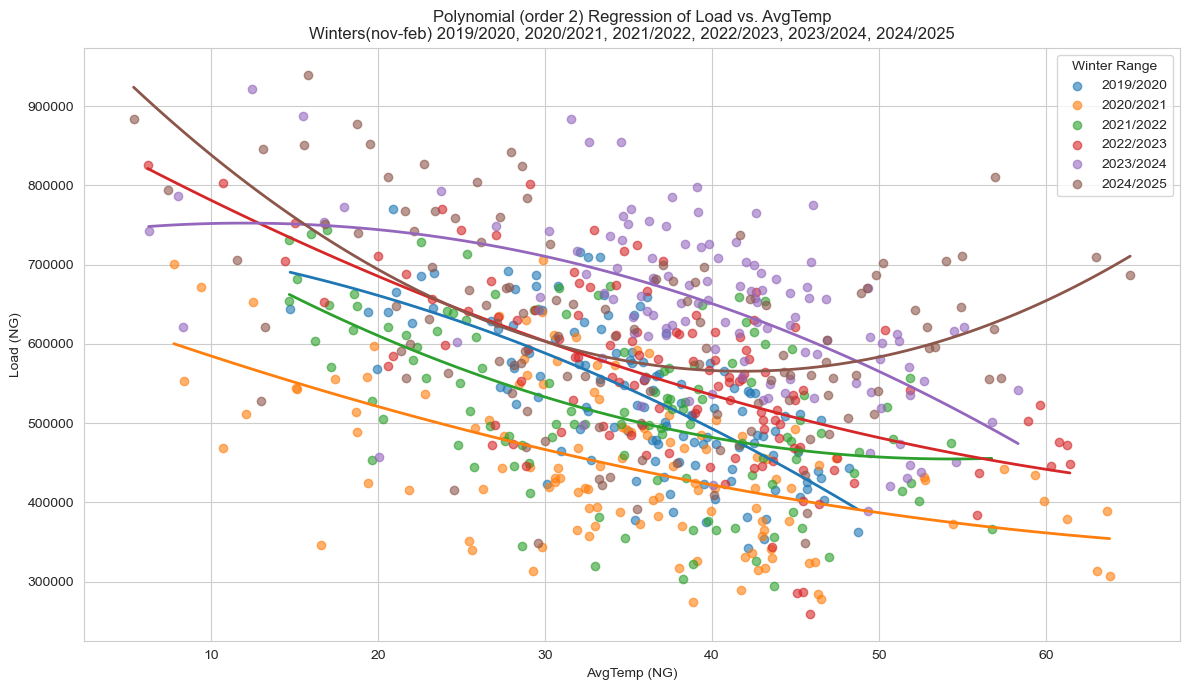

In [24]:
print("Natural gas winter daily total winter gen vs avg temp")
plot_load_vs_weather_winter(
    df=combined_df_gen,
    winters=["2019/2020", "2020/2021", "2021/2022", "2022/2023", "2023/2024", "2024/2025"],
    target_region="NG",
    target_variable="AvgTemp",
    polynomial_order=2
)

Natural gas winter daily total winter gen vs avg temp with growth YoY


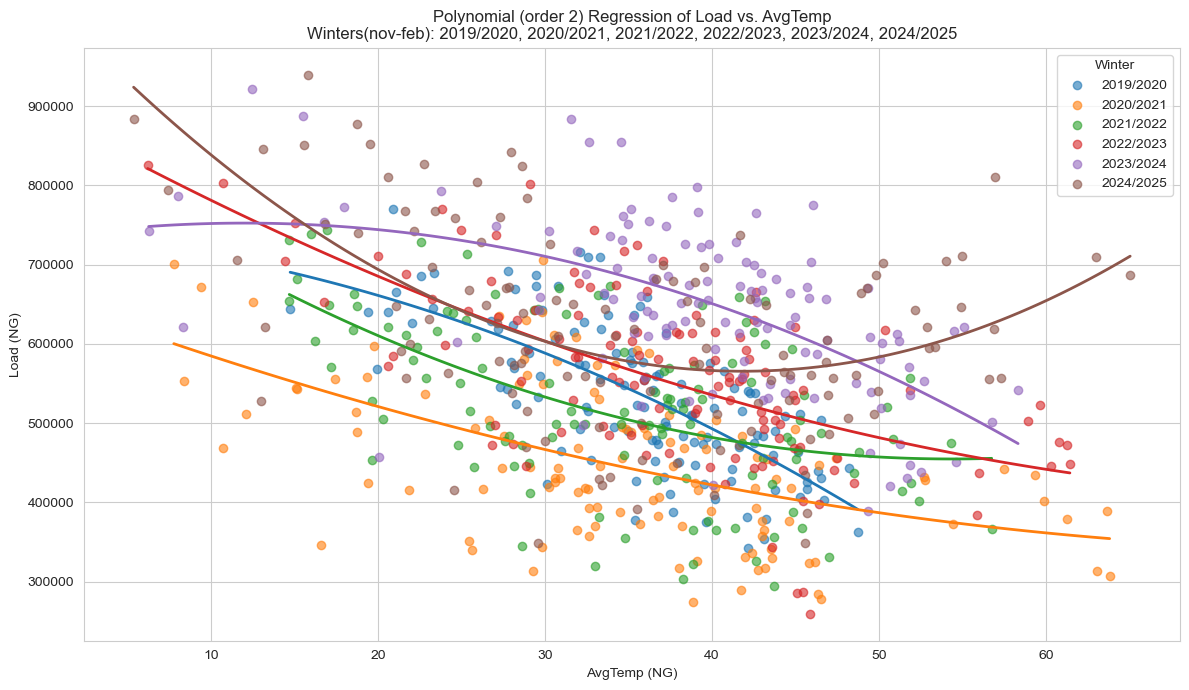

Winter  IntegratedValue  YoY_AbsChange  YoY_PctChange
0  2019/2020     2.113962e+07            NaN            NaN
1  2020/2021     1.798710e+07  -3.152518e+06     -14.912841
2  2021/2022     2.087260e+07   2.885498e+06      16.042041
3  2022/2023     2.308649e+07   2.213889e+06      10.606677
4  2023/2024     2.666652e+07   3.580036e+06      15.507061
5  2024/2025     2.456040e+07  -2.106125e+06      -7.898010

Natural gas winter daily total winter gen as percentage of total  vs avg temp with growth YoY


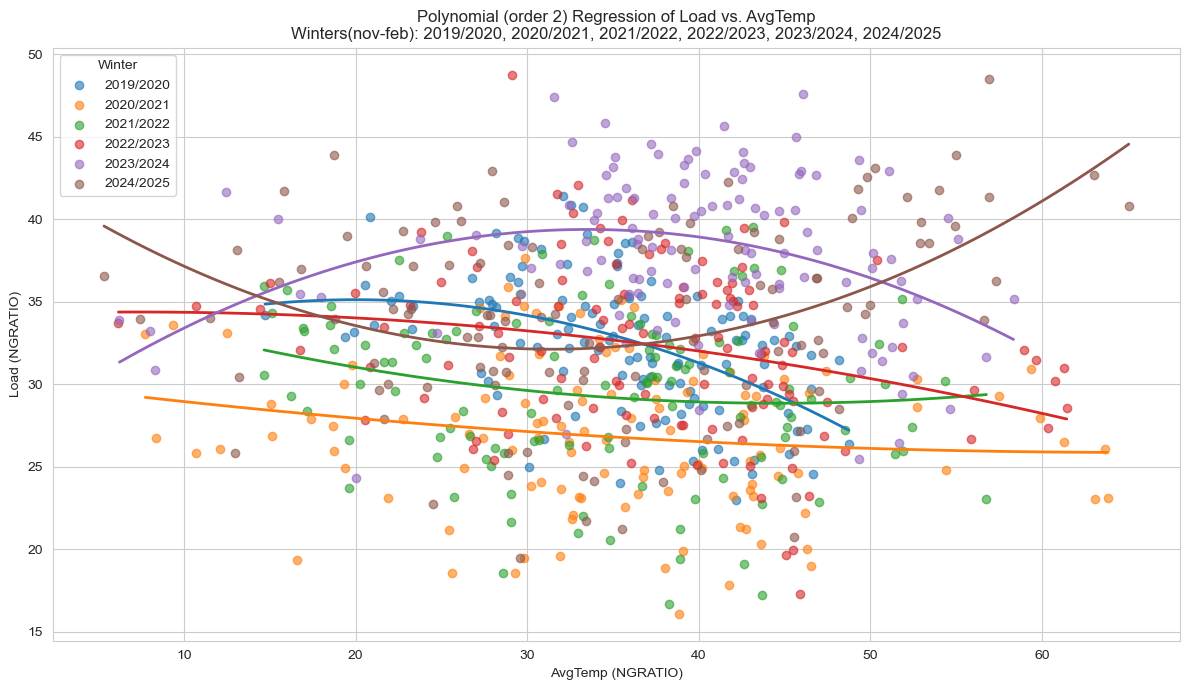

Winter  IntegratedValue  YoY_AbsChange  YoY_PctChange
0  2019/2020      1267.907167            NaN            NaN
1  2020/2021      1077.637581    -190.269586     -15.006587
2  2021/2022      1186.749465     109.111884      10.125100
3  2022/2023      1295.616339     108.866874       9.173535
4  2023/2024      1516.933622     221.317283      17.082008
5  2024/2025      1349.409050    -167.524572     -11.043632

In [25]:
print("Natural gas winter daily total winter gen vs avg temp with growth YoY")
results_df = integrated_load_vs_weather_winter(
        df=combined_df_gen,
        winters=["2019/2020", "2020/2021", "2021/2022", "2022/2023", "2023/2024", "2024/2025"],
        target_region="NG",
        target_variable="AvgTemp",
        polynomial_order=2,
        temp_min=15,
        temp_max=55
    )
display(results_df)

# appears to stronger geowth in gas gen with extreme colder and warmer winter temps but softer in mid temp range

print("Natural gas winter daily total winter gen as percentage of total  vs avg temp with growth YoY")
results_df = integrated_load_vs_weather_winter(
        df=combined_df_gen,
        winters=["2019/2020", "2020/2021", "2021/2022", "2022/2023", "2023/2024", "2024/2025"],
        target_region="NGRATIO",
        target_variable="AvgTemp",
        polynomial_order=2,
        temp_min=15,
        temp_max=55
    )
display(results_df)

Natural gas winter daily total winter gen vs avg temp with growth YoY


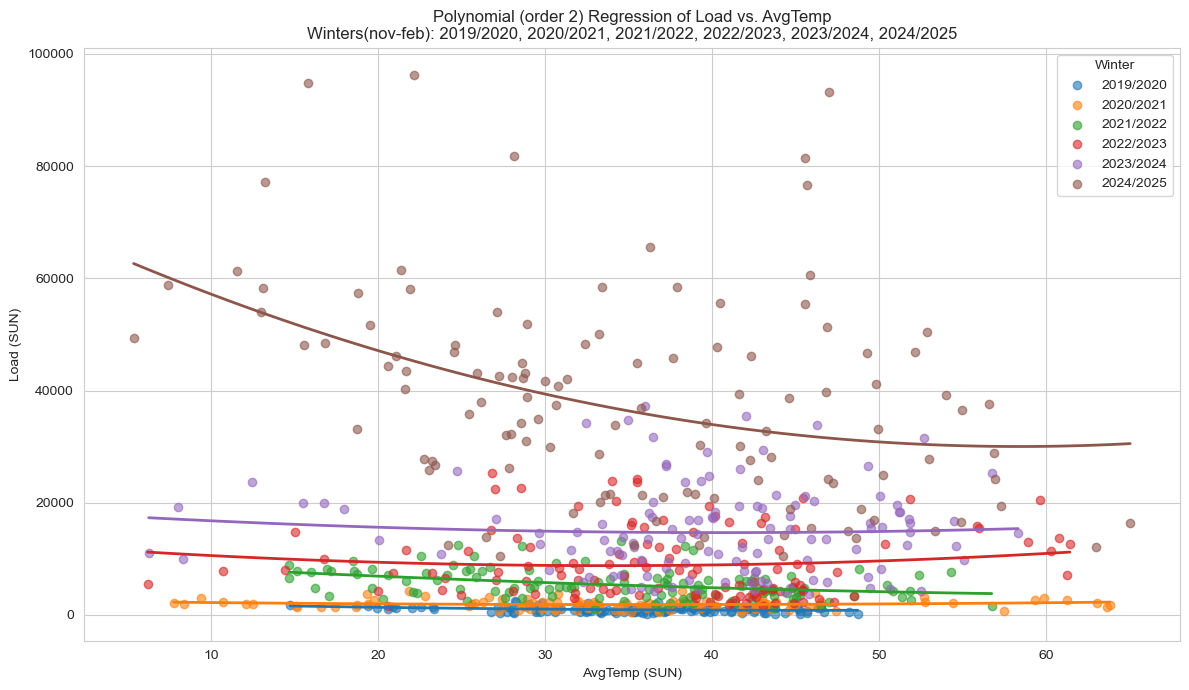

Winter  IntegratedValue  YoY_AbsChange  YoY_PctChange
0  2019/2020     4.108458e+04            NaN            NaN
1  2020/2021     7.675791e+04   35673.336855      86.829026
2  2021/2022     2.172222e+05  140464.283409     182.996487
3  2022/2023     3.684752e+05  151252.993932      69.630543
4  2023/2024     6.018238e+05  233348.635706      63.328181
5  2024/2025     1.516280e+06  914455.908585     151.947442

Natural gas winter daily total winter gen as percentage of total  vs avg temp with growth YoY


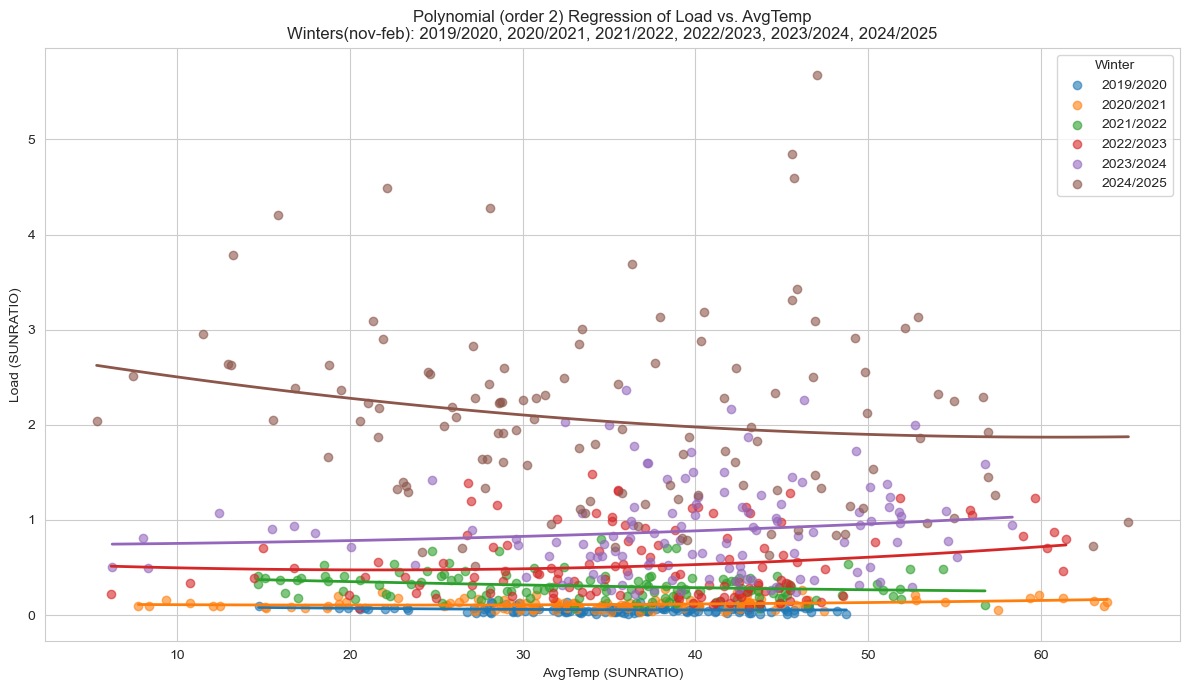

Winter  IntegratedValue  YoY_AbsChange  YoY_PctChange
0  2019/2020         2.441438            NaN            NaN
1  2020/2021         4.647883       2.206446      90.374866
2  2021/2022        12.260902       7.613018     163.795378
3  2022/2023        21.083155       8.822253      71.954359
4  2023/2024        34.576735      13.493580      64.001714
5  2024/2025        82.676771      48.100036     139.110984

In [26]:
print("Natural gas winter daily total winter gen vs avg temp with growth YoY")
results_df = integrated_load_vs_weather_winter(
        df=combined_df_gen,
        winters=["2019/2020", "2020/2021", "2021/2022", "2022/2023", "2023/2024", "2024/2025"],
        target_region="SUN",
        target_variable="AvgTemp",
        polynomial_order=2,
        temp_min=15,
        temp_max=55
    )
display(results_df)

# appears to stronger geowth in gas gen with extreme colder and warmer winter temps but softer in mid temp range

print("Natural gas winter daily total winter gen as percentage of total  vs avg temp with growth YoY")
results_df = integrated_load_vs_weather_winter(
        df=combined_df_gen,
        winters=["2019/2020", "2020/2021", "2021/2022", "2022/2023", "2023/2024", "2024/2025"],
        target_region="SUNRATIO",
        target_variable="AvgTemp",
        polynomial_order=2,
        temp_min=15,
        temp_max=55
    )
display(results_df)

Natural gas winter daily total winter gen vs avg temp with growth YoY


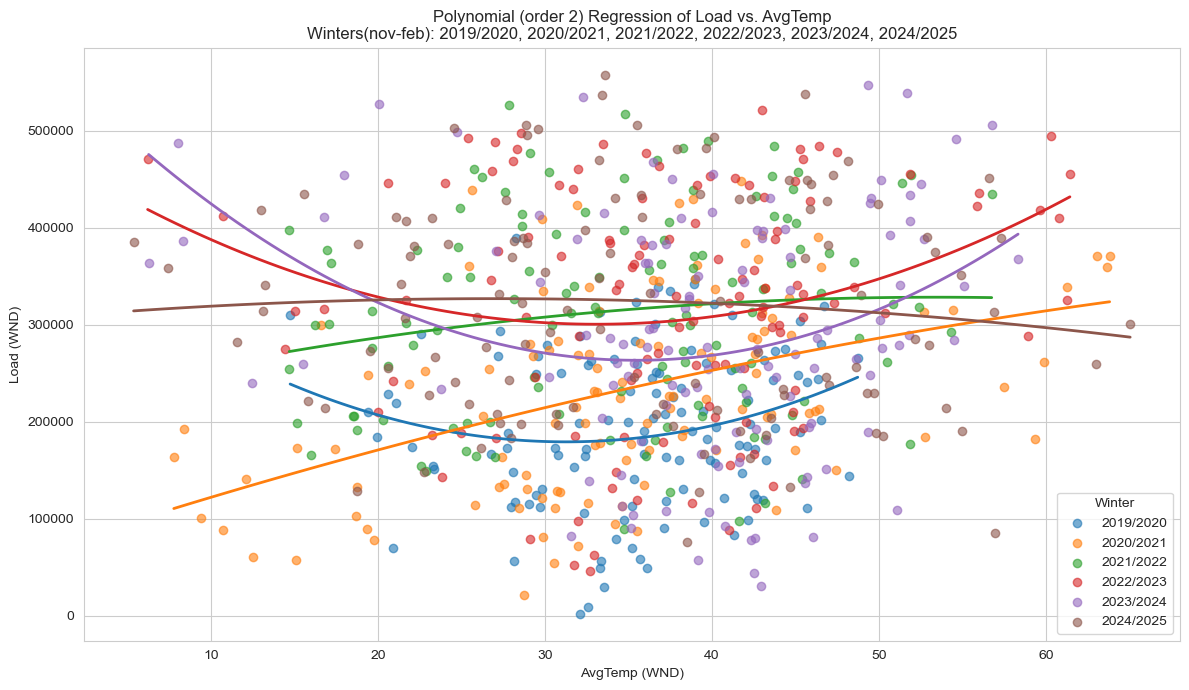

Winter  IntegratedValue  YoY_AbsChange  YoY_PctChange
0  2019/2020     8.456872e+06            NaN            NaN
1  2020/2021     9.238324e+06   7.814520e+05       9.240438
2  2021/2022     1.242724e+07   3.188920e+06      34.518385
3  2022/2023     1.291438e+07   4.871338e+05       3.919886
4  2023/2024     1.186040e+07  -1.053983e+06      -8.161314
5  2024/2025     1.285674e+07   9.963494e+05       8.400643

Natural gas winter daily total winter gen as percentage of total  vs avg temp with growth YoY


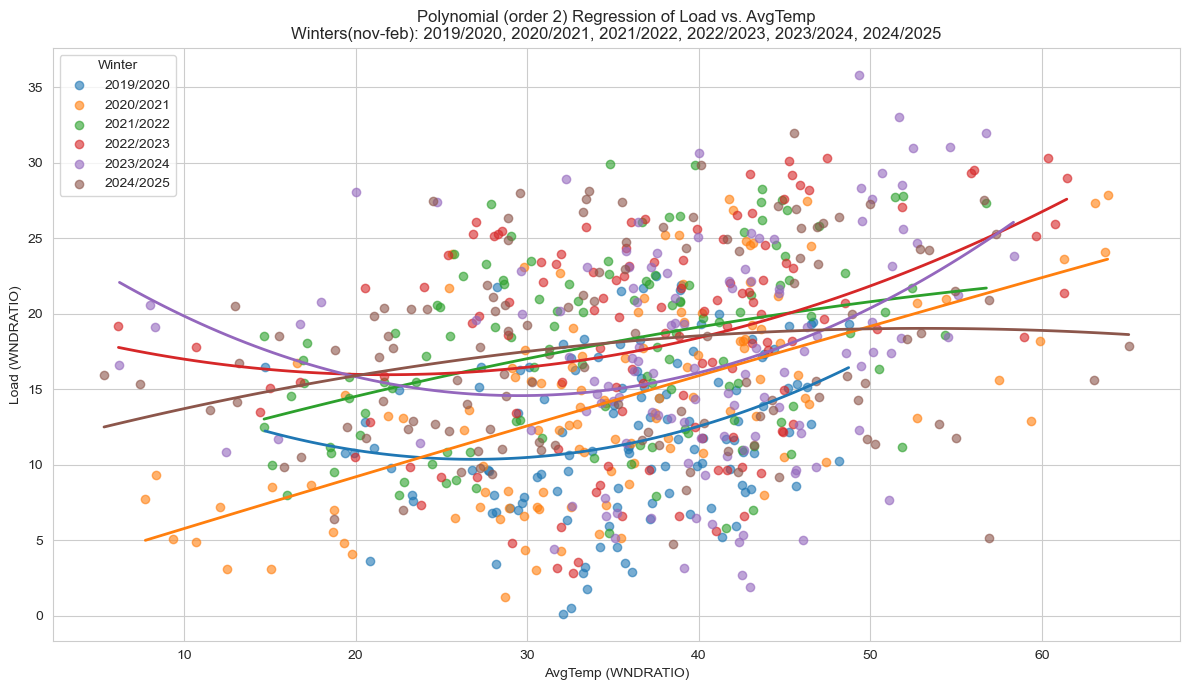

Winter  IntegratedValue  YoY_AbsChange  YoY_PctChange
0  2019/2020       515.751854            NaN            NaN
1  2020/2021       568.290469      52.538615      10.186801
2  2021/2022       714.033705     145.743236      25.645905
3  2022/2023       729.589949      15.556244       2.178643
4  2023/2024       673.518915     -56.071034      -7.685280
5  2024/2025       708.547455      35.028540       5.200825

In [27]:
print("Natural gas winter daily total winter gen vs avg temp with growth YoY")
results_df = integrated_load_vs_weather_winter(
        df=combined_df_gen,
        winters=["2019/2020", "2020/2021", "2021/2022", "2022/2023", "2023/2024", "2024/2025"],
        target_region="WND",
        target_variable="AvgTemp",
        polynomial_order=2,
        temp_min=15,
        temp_max=55
    )
display(results_df)

# appears to stronger geowth in gas gen with extreme colder and warmer winter temps but softer in mid temp range

print("Natural gas winter daily total winter gen as percentage of total  vs avg temp with growth YoY")
results_df = integrated_load_vs_weather_winter(
        df=combined_df_gen,
        winters=["2019/2020", "2020/2021", "2021/2022", "2022/2023", "2023/2024", "2024/2025"],
        target_region="WNDRATIO",
        target_variable="AvgTemp",
        polynomial_order=2,
        temp_min=15,
        temp_max=55
    )
display(results_df)

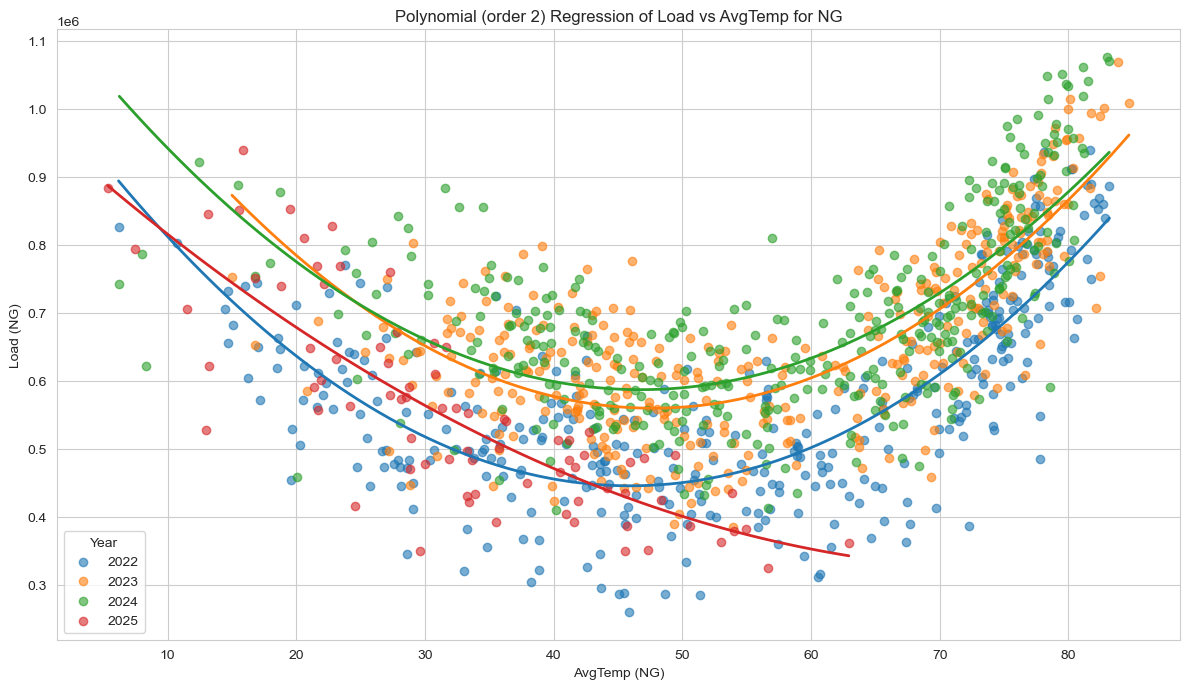

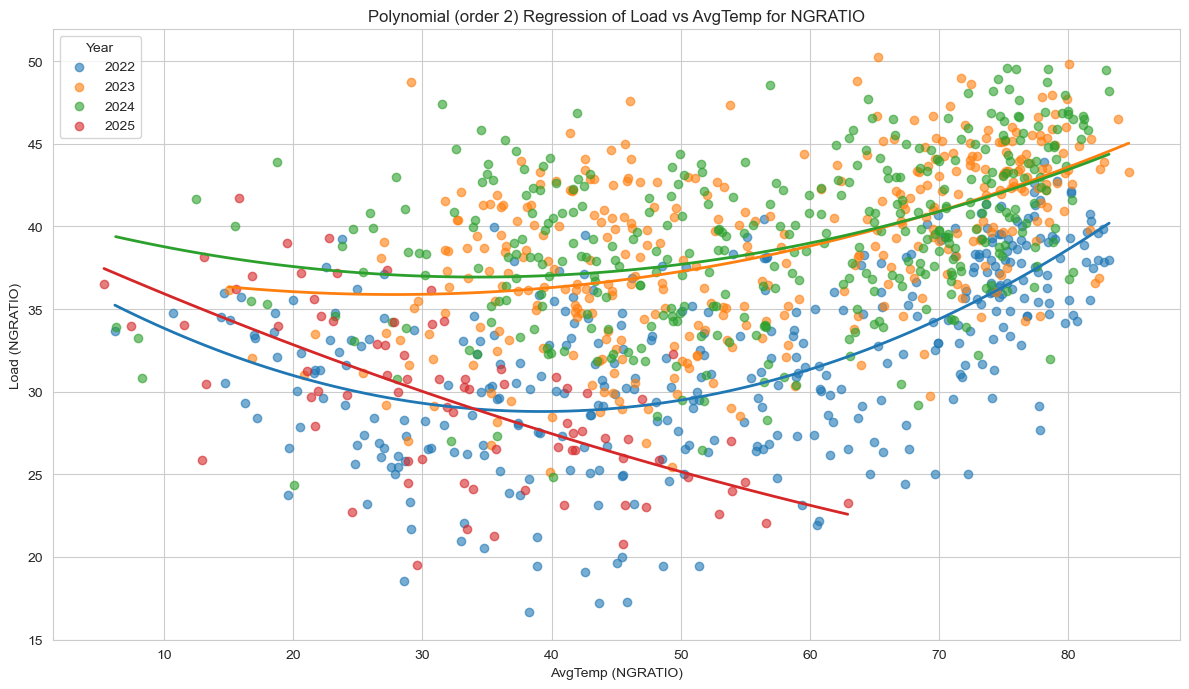

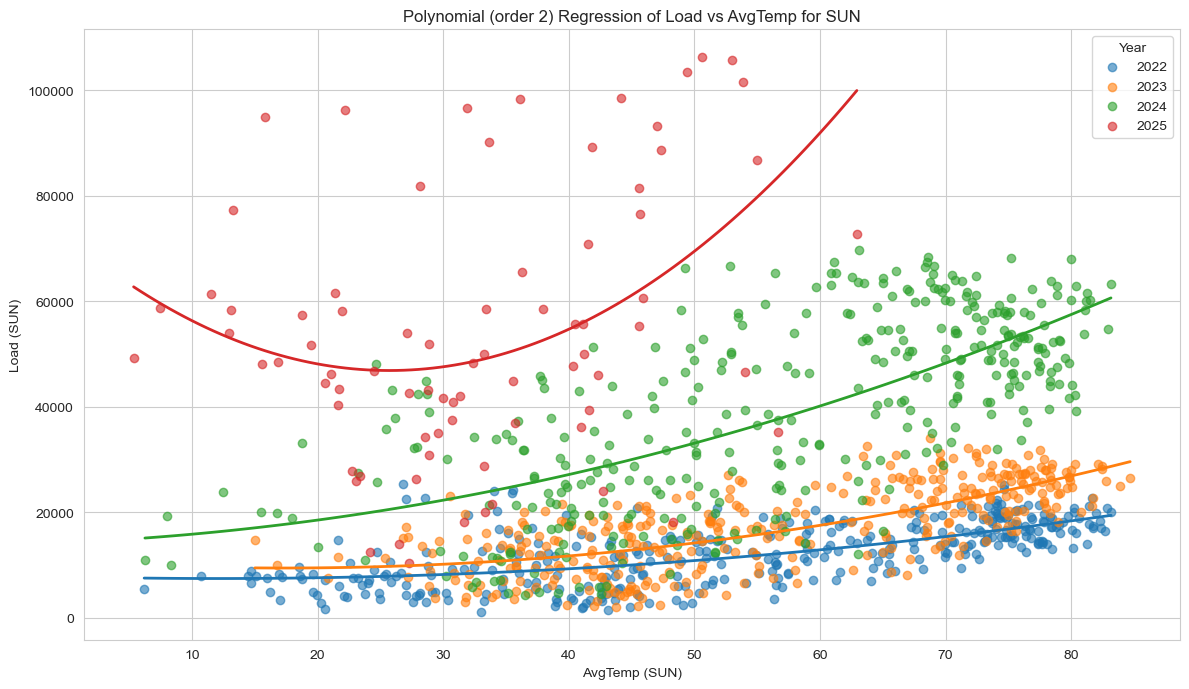

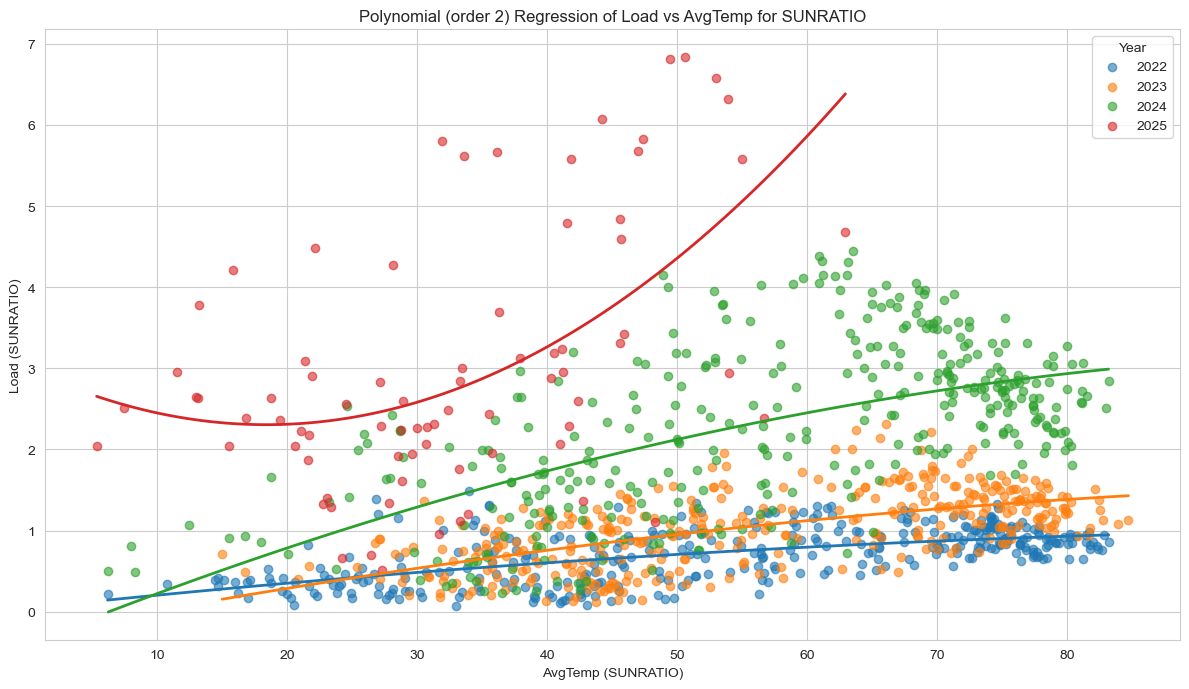

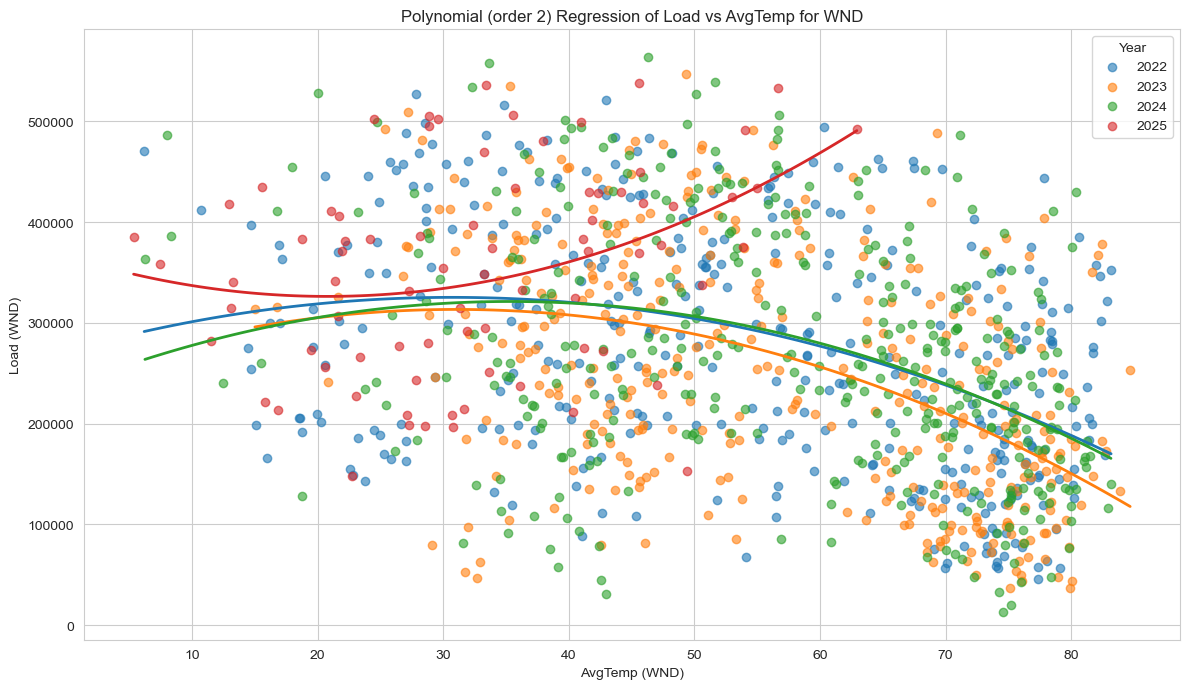

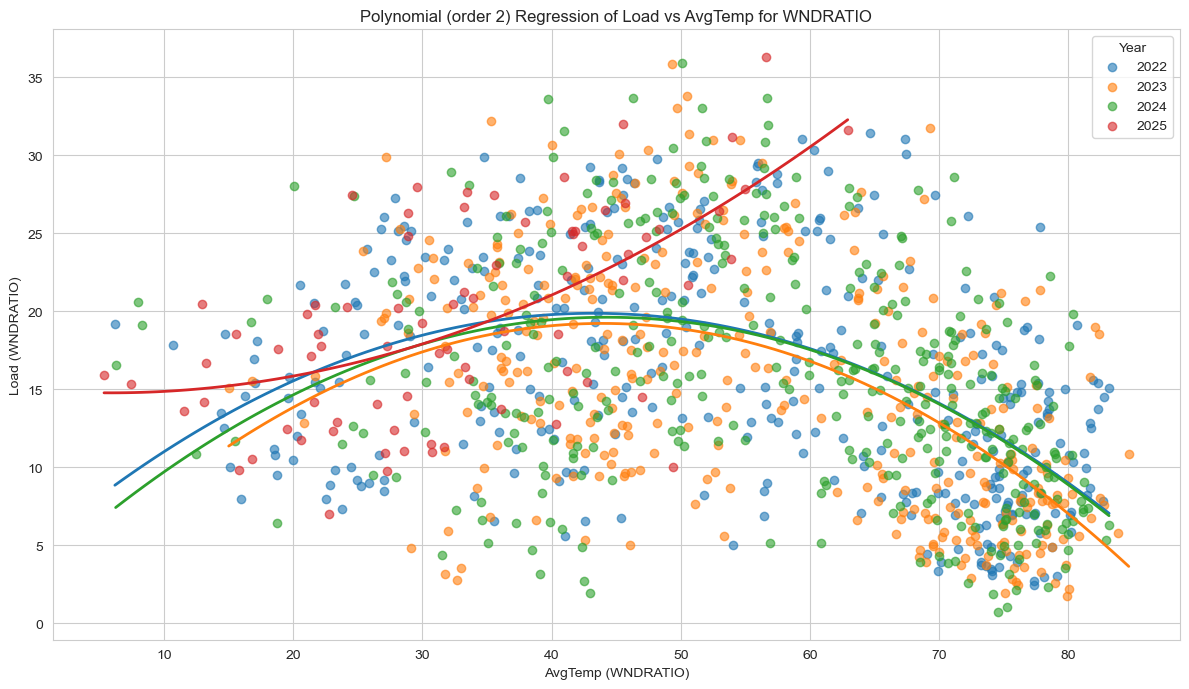

In [28]:
regions = [
    "NG", "NGRATIO", "SUN", "SUNRATIO", "WND", "WNDRATIO"
]

# Example usage:
# plot_load_vs_weather(combined_df, 'PJM_TOTAL', 'AvgTemp', polynomial_order=2, years=[2022,2023,2024,2025], months=[1,2,3,4,5,6,7,8,9,10,11,12])

for region in regions:
    plot_load_vs_weather(combined_df_gen, region, 'AvgTemp', polynomial_order=2, years=[2022,2023,2024,2025], months=[1,2,3,4,5,6,7,8,9,10,11,12])